<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-данных-на-наличие-аномалий" data-toc-modified-id="Исследование-данных-на-наличие-аномалий-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследование данных на наличие аномалий</a></span></li><li><span><a href="#Выделение-VIP-пользователей" data-toc-modified-id="Выделение-VIP-пользователей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Выделение VIP-пользователей</a></span></li><li><span><a href="#Портрет-пользователей-банка" data-toc-modified-id="Портрет-пользователей-банка-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Портрет пользователей банка</a></span></li><li><span><a href="#Портрет-отточных-пользователей-банка" data-toc-modified-id="Портрет-отточных-пользователей-банка-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Портрет отточных пользователей банка</a></span></li><li><span><a href="#Корреляция-признаков" data-toc-modified-id="Корреляция-признаков-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Корреляция признаков</a></span></li></ul></li><li><span><a href="#Сегментация" data-toc-modified-id="Сегментация-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Сегментация</a></span><ul class="toc-item"><li><span><a href="#Портрет-VIP-пользователей-банка-как-отдельного-сегмента" data-toc-modified-id="Портрет-VIP-пользователей-банка-как-отдельного-сегмента-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Портрет VIP-пользователей банка как отдельного сегмента</a></span><ul class="toc-item"><li><span><a href="#Корреляция-VIP-пользователей" data-toc-modified-id="Корреляция-VIP-пользователей-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Корреляция VIP-пользователей</a></span></li></ul></li><li><span><a href="#Сегментация-пользователей-по-количеству-продуктов" data-toc-modified-id="Сегментация-пользователей-по-количеству-продуктов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Сегментация пользователей по количеству продуктов</a></span><ul class="toc-item"><li><span><a href="#Сегмент-№-1" data-toc-modified-id="Сегмент-№-1-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Сегмент № 1</a></span></li><li><span><a href="#Сегмент-№-2" data-toc-modified-id="Сегмент-№-2-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Сегмент № 2</a></span></li><li><span><a href="#Сегмент-№-3" data-toc-modified-id="Сегмент-№-3-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Сегмент № 3</a></span></li><li><span><a href="#Сегмент-№-4" data-toc-modified-id="Сегмент-№-4-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Сегмент № 4</a></span></li></ul></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#" data-toc-modified-id="-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span></a></span></li><li><span><a href="#" data-toc-modified-id="-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span></a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Банки — сегментация пользователей по потреблению


**Задачи:**
- проанализировать клиентов регионального банка и сегментировать пользователей по количеству потребляемых продуктов, обращая особое внимание на отток;
- провести исследовательский анализ данных;
- разделить пользователей на основе данных о количестве потребляемых продуктов;
- сформулировать и проверить статистические гипотезы.

| Название столбца | Значение |
|------------------|----------|
|USERID | идентификатор пользователя|
|score| баллы кредитного скоринга (метод анализа заёмщика и выявления кредитных рисков)|
|city| город|
|gender|пол|
|age| возраст|
|equity| количество баллов собственности|
|balance| баланс на счёте|
|products| количество продуктов, которыми пользуется клиент|
|credit_card| есть ли кредитная карта|
|last_activity| активный клиент|
|EST_SALARY| оценочный доход клиента|
|сhurn| признак оттока|


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import plotly.express as px
import plotly.io as pio
import numpy as np
import seaborn as sns
from scipy import stats as st
import math as mth

In [2]:
try:
    df = pd.read_csv(r'C:/Users/shayb/Downloads/bank_scrooge.csv')
except:
    df = pd.read_csv('/datasets/bank_scrooge.csv')  

In [3]:
display(df.sample(5))
display(df.describe())
df.info()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
3955,195742,846.0,Ростов,Ж,65.0,3,562137.12,2,0,0,87995.33,0
2174,143340,830.0,Ярославль,Ж,72.0,2,294375.63,3,1,1,8032.18,0
3418,151845,860.0,Ростов,Ж,34.0,2,1025144.73,4,0,1,90595.46,1
2870,116695,828.0,Ростов,М,32.0,4,386079.29,2,1,1,32166.83,0
7756,203587,905.0,Рыбинск,М,53.0,5,1353976.30,4,1,1,131275.34,1


,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


На первый взгляд про датафрейм можно сказать следующее:

* в датафрейме 10 000 записей;
* названия столбцов не соответствуют общепринятому стилю;
* в столбцах age и balance присутствуют пропуски;
* в некоторых столбцах не верный тип данных.

## Предобработка данных

Исправим наименования колонок.

In [4]:
df.columns = df.columns.str.lower()
df.rename(columns = {'userid':'user_id'}, inplace = True)

Изменим тип данных в столбце age.

In [5]:
df['age'] = df['age'].astype('int64', errors='ignore')

Исследуем пропуски.

In [6]:
print('Процент пропусков в столбце age:',
      (df['age'].isna().sum() * 100 / len(df)))

Процент пропусков в столбце age: 0.26


В столбце age пропусков меньше 1 %, так что просто удалим строки с пропусками. На данные это не повлияет.

In [7]:
df = df.dropna(subset=['age']).reset_index(drop=True)

Посмотрим на пропуски в столбце balance. Исследуем отдельно пользователей с пропусками и пользователей без пропусков в столбце баланс.

In [8]:
df['balance'].isna().sum()

2279

In [9]:
balance_isna = df.loc[df['balance'].isna()].reset_index(drop=True)
balance_no_isna = df.loc[df['balance'] != df['balance'].isna()].reset_index(
    drop=True)

In [10]:
for column in ['city','products','credit_card','last_activity', 'churn', 'equity']:
    print(column)
    print(round(balance_isna[column].value_counts(normalize=True),2))
    print();

city
Ярославль    0.64
Рыбинск      0.26
Ростов       0.10
Name: city, dtype: float64

products
1    0.85
2    0.14
3    0.01
0    0.00
Name: products, dtype: float64

credit_card
1    0.82
0    0.18
Name: credit_card, dtype: float64

last_activity
1    0.55
0    0.45
Name: last_activity, dtype: float64

churn
0    0.99
1    0.01
Name: churn, dtype: float64

equity
0    0.95
1    0.05
3    0.00
Name: equity, dtype: float64



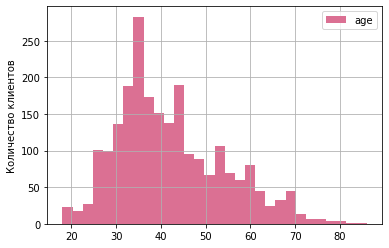

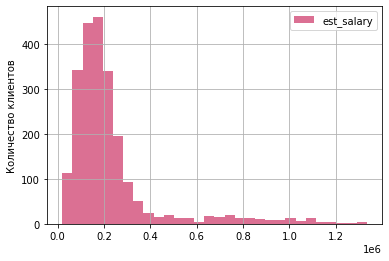

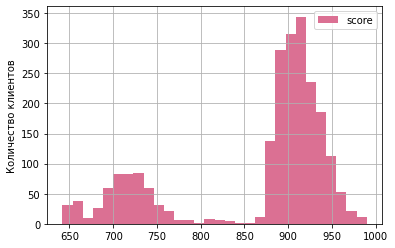

In [11]:
for column in ['age', 'est_salary', 'score']:
    balance_isna.plot(y=column,
                      kind='hist',
                      bins=30,
                      grid=True,
                      color='#DB7093')
    plt.ylabel('Количество клиентов')

Отличительные черты группы с пропусками:
- большинство пользователей не имеют баллов собственности
- большинство пользователей имют 1 продукт
- много пользователей с кредитными картами
- маленькая доля отточных пользователей
- возраст пользователей от 30 до 40
- з/п до 400 000 тыс.
- высокие баллы скоринга

А теперь посмотрим на данные без пропусков.

In [12]:
for column in [
        'city', 'products', 'credit_card', 'last_activity', 'churn', 'equity'
]:
    print(column)
    print(round(balance_no_isna[column].value_counts(normalize=True), 2))
    print()

city
Ярославль    0.59
Рыбинск      0.27
Ростов       0.14
Name: city, dtype: float64

products
2    0.51
1    0.33
3    0.10
4    0.05
5    0.00
0    0.00
Name: products, dtype: float64

credit_card
1    0.68
0    0.32
Name: credit_card, dtype: float64

last_activity
1    0.52
0    0.48
Name: last_activity, dtype: float64

churn
0    0.82
1    0.18
Name: churn, dtype: float64

equity
0    0.26
5    0.19
4    0.19
3    0.15
2    0.11
1    0.08
6    0.02
7    0.01
8    0.00
9    0.00
Name: equity, dtype: float64



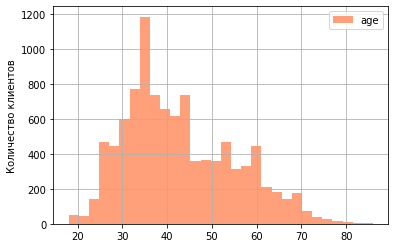

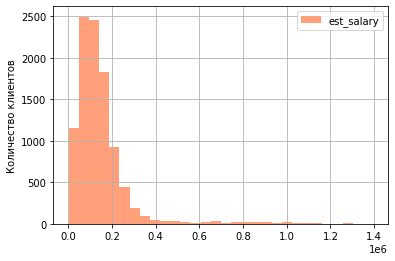

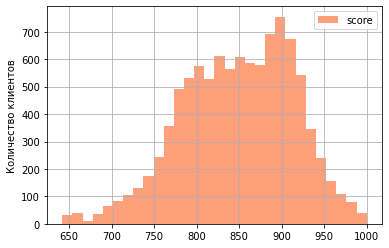

In [13]:
for column in ['age', 'est_salary', 'score']:
    balance_no_isna.plot(y=column,
                         kind='hist',
                         bins=30,
                         grid=True,
                         color='#FFA07A')
    plt.ylabel('Количество клиентов')

Отличительные черты группы без пропусков:

* у 30 % пользователей нет баллов собственности. У 19 % по 4 и 5 баллов собственности;
* у половины пользователей 2 продукта;
* у 68 % пользователей есть кредитные карты;
* 18 % пользователей ооточные4
* возраст пользователей от 30 до 45 лет;
* з/п от 0 до 200 000 тыс.
* у большинства пользователей баллы скоринга от 800 до 900.

**Вывод:**
Можно предположить, что у пользователей с пропусками в нашем банке ипотека. Также можно предположить, что эти клиенты пользуются продуктами банка, которые не предполагают наличия какого-то баланса. Например, ячейки, страховые услуги и др.
Никаких закономерностей и зависимостей не выявлено, поэтому мы не будем заполнять пропуски, чтобы не искажать данные.

Проверим датасет на дубликаты.

In [14]:
df.duplicated().sum()

0

In [15]:
df.duplicated(subset=['user_id']).sum()

50

In [16]:
df_dup_1 = df.loc[df.duplicated(subset=['user_id'], keep = 'first')]
display(df_dup_1.head(5))
df_dup_2 = df.loc[df.duplicated(subset=['user_id'], keep = 'last')]
df_dup_2.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1582,190253,726.0,Ярославль,М,49.0,0,NaN,1,1,1,177700.78,0
1836,210662,896.0,Рыбинск,Ж,37.0,0,NaN,2,0,0,90916.04,0
2137,131419,739.0,Рыбинск,Ж,37.0,3,1307941.65,3,0,0,103867.47,0
2300,220816,934.0,Рыбинск,Ж,74.0,5,1294285.39,3,1,0,95606.80,0
2995,208081,821.0,Рыбинск,Ж,62.0,3,493608.26,2,1,1,33491.45,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
58,164676,860.0,Ярославль,М,37.0,5,648594.03,2,1,1,213586.86,1
150,185748,850.0,Рыбинск,М,36.0,5,1203376.67,2,0,1,89401.82,1
161,197364,928.0,Рыбинск,Ж,53.0,6,1347183.86,2,0,1,168189.49,1
231,190253,823.0,Рыбинск,М,37.0,4,373348.39,2,0,1,131947.92,1
690,152479,768.0,Рыбинск,Ж,42.0,0,126787.79,4,1,1,143233.23,1


Можно предположить, что дубликаты появились из-за того, что идентификатор ушедших пользователей присваивали новым пользователям. Удалим новых пользователей, так как нас в первую очередь интересует отток.

In [17]:
df = df.drop_duplicates(subset=['user_id'], keep='last').reset_index(drop=True)

## Исследовательский анализ данных
### Исследование данных на наличие аномалий

Проверим датасет на аномалии.

**age**

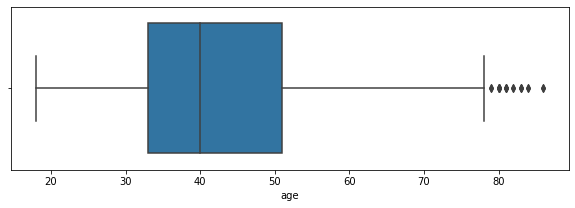

In [18]:
plt.figure(figsize=(10, 3))
sns.boxplot(x='age', data=df)
plt.show();

В столбце age есть выбросы. Посчитаем сколько их, а потом очистим от них данные.

In [19]:
df.query('age > 78')['age'].count()

22

In [20]:
df = df.query('age < 78')

**score**

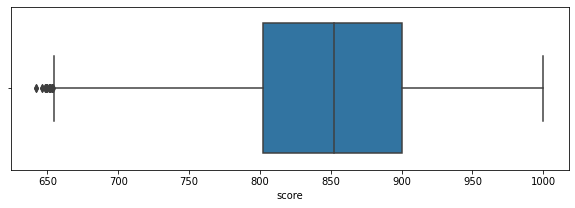

In [21]:
plt.figure(figsize=(10, 3))
sns.boxplot(x='score', data=df)
plt.show();

У нас есть незначительное количество выбросов, не будет от них избавляться, так как стандартное отклонение значительно ниже среднего.

**balance**

В данном столбце точно есть выбросы, исследуем подровнее.

In [22]:
df['balance'].describe()

count    7.626000e+03
mean     8.240339e+05
std      1.981275e+06
min      0.000000e+00
25%      2.948188e+05
50%      5.213400e+05
75%      9.756014e+05
max      1.191136e+08
Name: balance, dtype: float64

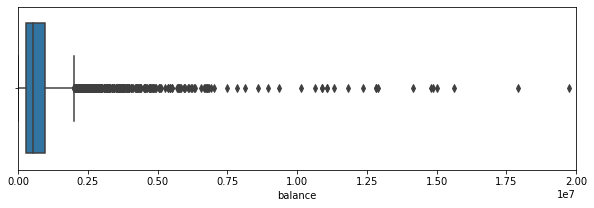

In [23]:
plt.figure(figsize=(10, 3))
sns.boxplot(x='balance', data=df)
plt.xlim(0, 2e+07)
plt.show();

Основная масса пользователей (без выбросов) имеет на балансе примерно до 1 600 000 млн.

Посмотрим на распределение этих пользователей на гистограмме.

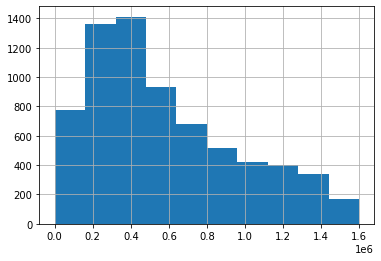

In [24]:
df.query('balance < 1600000')['balance'].hist();

Посмотрим как выглядит боксплот.

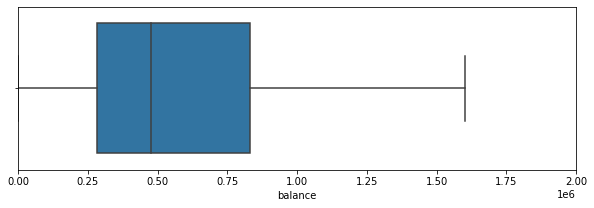

In [25]:
poor = df.query('balance < 1600000')
plt.figure(figsize=(10, 3))
sns.boxplot(x='balance', data=poor)
plt.xlim(0, 2e+06)
plt.show();

Теперь посмотрим на очень богатых пользователей, которые и являются выбросами.

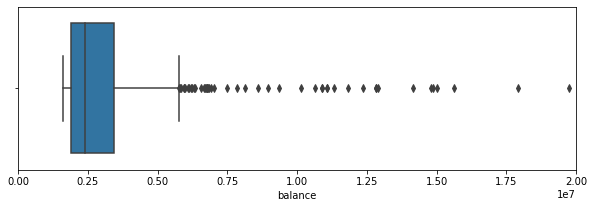

In [26]:
rich = df.query('balance > 1600000')
plt.figure(figsize=(10, 3))
sns.boxplot(x='balance', data=rich)
plt.xlim(0, 2e+07)
plt.show();

Даже при разделении пользователей на две группы есть аномалии. Удалим из датасета пользователей на балансе у которых больше 5 000 000 млн., чтобы данные были корректными.

In [27]:
anom = df.query('balance > 5000000')
df.drop(anom.index, axis=0, inplace=True)

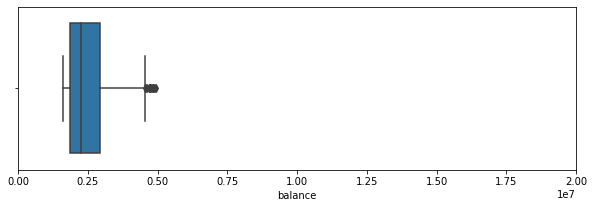

In [28]:
rich = df.query('balance > 1600000')
plt.figure(figsize=(10, 3))
sns.boxplot(x='balance', data=rich)
plt.xlim(0, 2e+07)
plt.show();

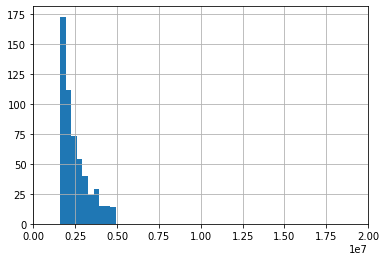

In [29]:
df.query('balance > 1600000')['balance'].hist()
plt.xlim(0, 2e+07);

In [30]:
rich = df.query('balance > 1600000')
rich['balance'].describe()

count    5.490000e+02
mean     2.503872e+06
std      8.233035e+05
min      1.600487e+06
25%      1.856031e+06
50%      2.235533e+06
75%      2.931345e+06
max      4.936494e+06
Name: balance, dtype: float64

Вот теперь все хорошо.

**est_salary**

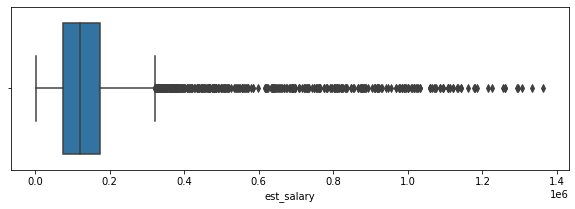

In [31]:
plt.figure(figsize=(10, 3))
sns.boxplot(x='est_salary', data=df)
plt.show();

Основная масса пользователей имеет з/п примерно до 300000 тыс.

Посмотрим на распределение этих пользователей на гистограмме.

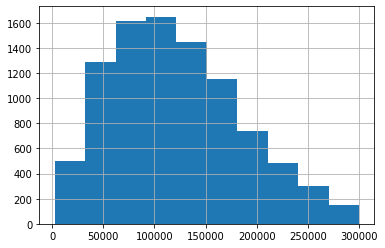

In [32]:
df.query('est_salary < 300000')['est_salary'].hist();

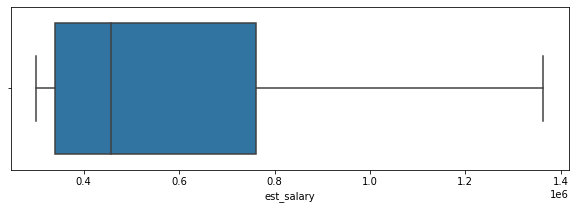

In [33]:
plt.figure(figsize=(10, 3))
sns.boxplot(x='est_salary', data=df.query('est_salary > 300000'))
plt.show();

<AxesSubplot:>

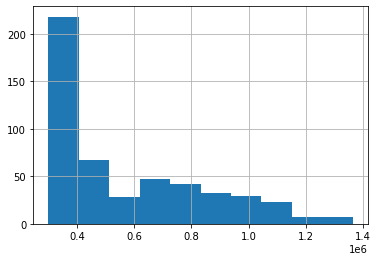

In [34]:
df.query('est_salary > 300000')['est_salary'].hist()

### Выделение VIP-пользователей

У нас есть пользователи, у которых баланс на карте или з/п выше среднего. Создадим отдельный столбец "vip", в котором очень обеспеченных пользователей обозначим цифрой 1, а всех остальных цифрой 0. Это нужно для того, чтобы не потерять прибыльных клиентов банка и изучить их отдельно.

In [35]:
def vip (row):
    balance = row['balance']
    salary = row['est_salary']
    if balance >= 1600000 or salary > 300000:
        return 1
    elif balance < 1600000 or salary < 300000:
        return 0
df['vip'] = df.apply(vip, axis = 1)

### Портрет пользователей банка

,city,churn,user_id,user_id_%
0,Ростов,235,1349,0.15
1,Рыбинск,348,2423,0.27
2,Ярославль,856,5091,0.57


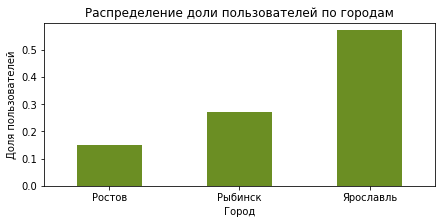

In [36]:
df_group = df.query('vip == 0').pivot_table(index='city',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['user_id_%'] = round(df_group['user_id'] / df_group['user_id'].sum(), 2)
display(df_group)


df_group.plot(x='city',
              y='user_id_%',
              kind='bar',
              figsize=(7, 3),
              color ='#6B8E23',
              fontsize=10,
              legend=False)
plt.xticks(rotation=360) 
plt.xlabel('Город')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по городам');

,credit_card,churn,user_id,user_id_%
0,0,603,2740,0.31
1,1,836,6123,0.69


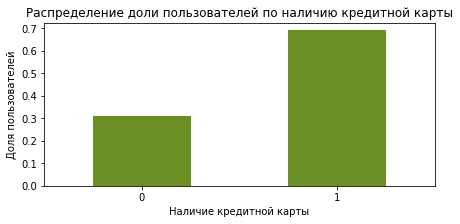

In [37]:
df_group = df.query('vip == 0').pivot_table(index='credit_card',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['user_id_%'] = round(df_group['user_id'] / df_group['user_id'].sum(), 2)
display(df_group)


df_group.plot(x='credit_card',
              y='user_id_%',
              kind='bar',
              figsize=(7, 3),
              color ='#6B8E23',
              fontsize=10,
              legend=False)
plt.xticks(rotation=360) 
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по наличию кредитной карты');

,last_activity,churn,user_id,user_id_%
0,0,436,4256,0.48
1,1,1003,4607,0.52


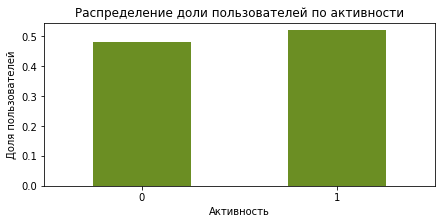

In [38]:
df_group = df.query('vip == 0').pivot_table(index='last_activity',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['user_id_%'] = round(df_group['user_id'] / df_group['user_id'].sum(), 2)
display(df_group)


df_group.plot(x='last_activity',
              y='user_id_%',
              kind='bar',
              figsize=(7, 3),
              color ='#6B8E23',
              fontsize=10,
              legend=False)
plt.xticks(rotation=360) 
plt.xlabel('Активность')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по активности');

,gender,churn,user_id,user_id_%
0,Ж,521,4521,0.51
1,М,918,4342,0.49


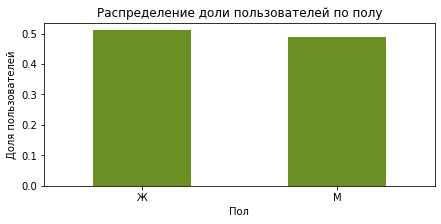

In [39]:
df_group = df.query('vip == 0').pivot_table(index='gender',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['user_id_%'] = round(df_group['user_id'] / df_group['user_id'].sum(), 2)
display(df_group)


df_group.plot(x='gender',
              y='user_id_%',
              kind='bar',
              figsize=(7, 3),
              color ='#6B8E23',
              fontsize=10,
              legend=False)
plt.xticks(rotation=360) 
plt.xlabel('Пол')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по полу');

,equity,churn,user_id,user_id_%
0,0,82,2232,0.25
1,1,89,744,0.08
2,2,149,1008,0.11
3,3,266,1422,0.16
4,4,352,1633,0.18
5,5,423,1594,0.18
6,6,38,135,0.02
7,7,30,69,0.01
8,8,4,14,0.00
9,9,6,12,0.00


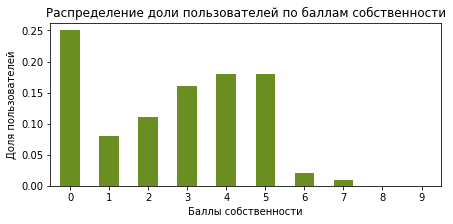

In [40]:
df_group = df.query('vip == 0').pivot_table(index='equity',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['user_id_%'] = round(df_group['user_id'] / df_group['user_id'].sum(), 2)
display(df_group)


df_group.plot(x='equity',
              y='user_id_%',
              kind='bar',
              figsize=(7, 3),
              color ='#6B8E23',
              fontsize=10,
              legend=False)
plt.xticks(rotation=360) 
plt.xlabel('Баллы собственности')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по баллам собственности');

,products,churn,user_id,user_id_%
0,1,215,2957,0.33
1,2,799,4649,0.52
2,3,235,899,0.10
3,4,183,340,0.04
4,5,7,18,0.00


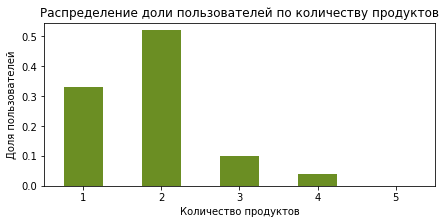

In [41]:
df_group = df.query('vip == 0').pivot_table(index='products',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['user_id_%'] = round(df_group['user_id'] / df_group['user_id'].sum(), 2)
display(df_group)


df_group.plot(x='products',
              y='user_id_%',
              kind='bar',
              figsize=(7, 3),
              color ='#6B8E23',
              fontsize=10,
              legend=False)
plt.xticks(rotation=360) 
plt.xlabel('Количество продуктов')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по количеству продуктов');

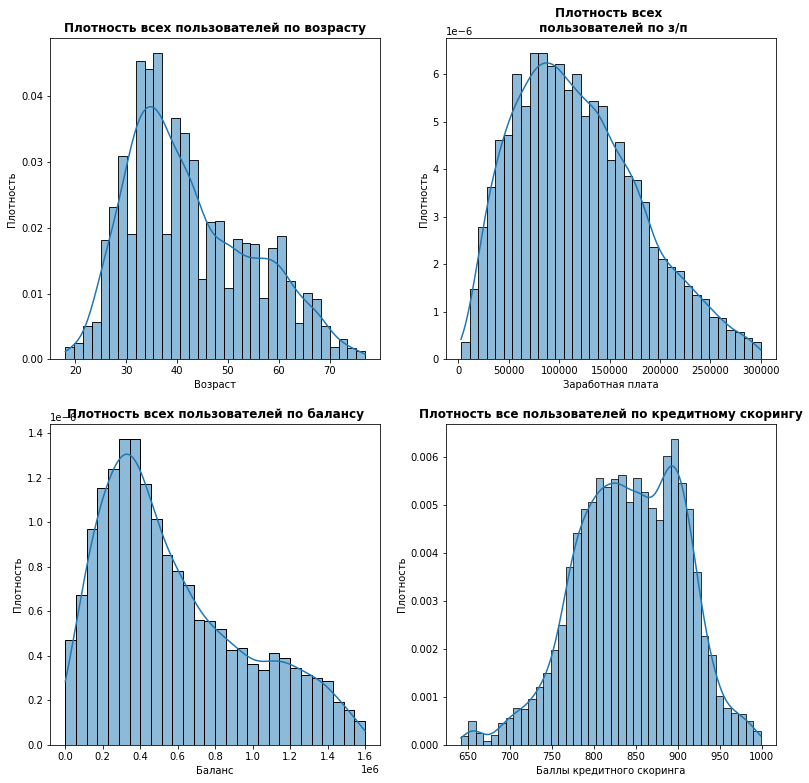

In [42]:
vip_no = df.query('vip == 0')
plt.figure(figsize=(13, 13))

plt.subplot(2, 2, 1)
sns.histplot(x='age',
             data=vip_no,
             stat='density',
             palette='rocket',
             kde=True,
             common_norm=False)
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.title('Плотность всех пользователей по возрасту', weight='bold');

plt.subplot(2, 2, 2)
sns.histplot(x='est_salary',
             data=vip_no,
             palette='husl',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Заработная плата')
plt.ylabel('Плотность')
plt.title('Плотность всех \n пользователей по з/п', weight='bold');

plt.subplot(2, 2, 3)
sns.histplot(x='balance',
             data=vip_no,
             palette='husl',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Баланс')
plt.ylabel('Плотность')
plt.title('Плотность всех пользователей по балансу', weight='bold');

plt.subplot(2, 2, 4)
sns.histplot(x='score',
             data=vip_no,
             palette='husl',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Плотность')
plt.title('Плотность все пользователей по кредитному скорингу', weight='bold');

**Вывод:**
- половина пользователей из Ярославля;
- пользователей с кредитными картами в два раза больше;
- активных и неактивных пользователей примерно поровну;
- мужчин и женщин среди пользователей примерно одинаковое количетсво;
- у большинства пользователей 0 баллов собственности;
- большинство польззователей пользуются двумя продуктами;
- возраст пользователей от 18 до 78 лет. больше всего пользователей возрастом от 30 до 40 лет;
- заработная плата многих пользователей от 75 000 до 125 000 тыс;
- баланс многих пользователей 300 000 - 400 000 тыс;
- баллы скоринга пользователей от 650 до 1000.

### Портрет отточных пользователей банка

In [43]:
print('Процент отточных пользователей:', round(df.query('vip == 0 & churn == 1')['user_id'].count() / df.query(
    'vip == 0')['user_id'].count() * 100))

Процент отточных пользователей: 16


,city,churn,user_id,churn_%,churn_no_%
0,Ростов,235,1349,0.17,0.83
1,Рыбинск,348,2423,0.14,0.86
2,Ярославль,856,5091,0.17,0.83


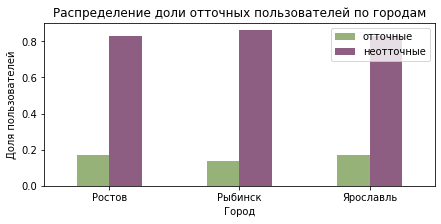

In [44]:
df_group = df.query('vip == 0').pivot_table(index='city',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='city',
              y=['churn_%','churn_no_%'],
              kind='bar',
              figsize=(7, 3),
              color=['#96b279','#8d5e82'],
              fontsize=10)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Город')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли отточных пользователей по городам');


|||
|:-------|:---------------------|
|**Вывод**|Среди отточных пользователей больше всего пользователей из ярославля.|

,credit_card,churn,user_id,churn_%,churn_no_%
0,0,603,2740,0.22,0.78
1,1,836,6123,0.14,0.86


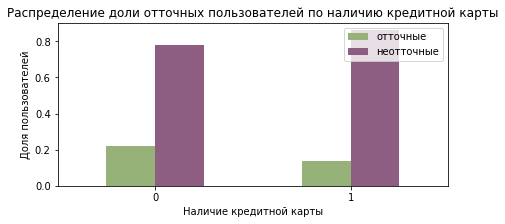

In [45]:
df_group = df.query('vip == 0').pivot_table(index='credit_card',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='credit_card',
              y=['churn_%', 'churn_no_%'],
              kind='bar',
              figsize=(7, 3),
              color=['#96b279','#8d5e82'],
              fontsize=10)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли отточных пользователей по наличию кредитной карты');

,gender,churn,user_id,churn_%,churn_no_%
0,Ж,521,4521,0.12,0.88
1,М,918,4342,0.21,0.79


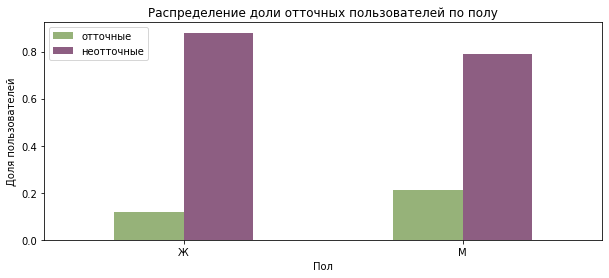

In [46]:
df_group = df.query('vip == 0').pivot_table(index='gender',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='gender',
              y=['churn_%', 'churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#96b279','#8d5e82'],
              fontsize=10)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Пол')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли отточных пользователей по полу');

,last_activity,churn,user_id,churn_%,churn_no_%
0,0,436,4256,0.10,0.90
1,1,1003,4607,0.22,0.78


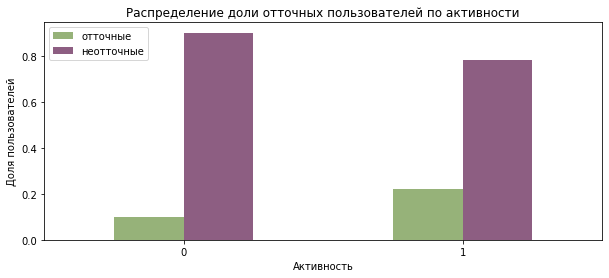

In [47]:
df_group = df.query('vip == 0').pivot_table(index='last_activity',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='last_activity',
              y=['churn_%', 'churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#96b279','#8d5e82'],
              fontsize=10)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Активность')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли отточных пользователей по активности');

,equity,churn,user_id,churn_%,churn_no_%
0,0,82,2232,0.04,0.96
1,1,89,744,0.12,0.88
2,2,149,1008,0.15,0.85
3,3,266,1422,0.19,0.81
4,4,352,1633,0.22,0.78
5,5,423,1594,0.27,0.73
6,6,38,135,0.28,0.72
7,7,30,69,0.43,0.57
8,8,4,14,0.29,0.71
9,9,6,12,0.50,0.50


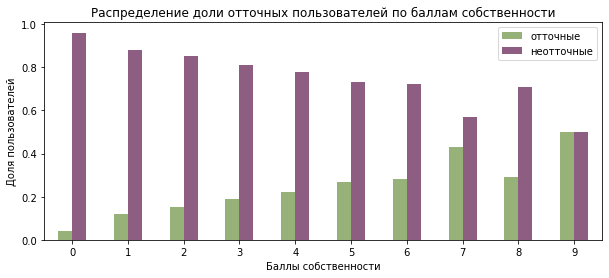

In [48]:

df_group = df.query('vip == 0').pivot_table(index='equity',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='equity',
              y=['churn_%', 'churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#96b279','#8d5e82'],
              fontsize=10)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Баллы собственности')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли отточных пользователей по баллам собственности');

,products,churn,user_id,churn_%,churn_no_%
0,1,215,2957,0.07,0.93
1,2,799,4649,0.17,0.83
2,3,235,899,0.26,0.74
3,4,183,340,0.54,0.46
4,5,7,18,0.39,0.61


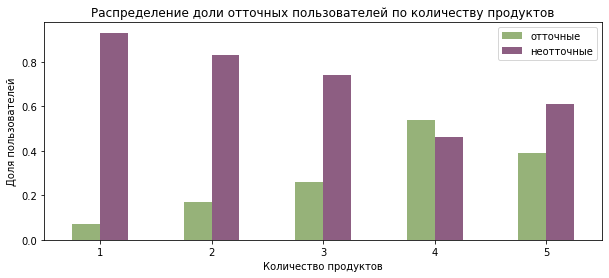

In [49]:
df_group = df.query('vip == 0').pivot_table(index='products',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='products',
              y=['churn_%', 'churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#96b279','#8d5e82'],
              fontsize=10)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Количество продуктов')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли отточных пользователей по количеству продуктов');

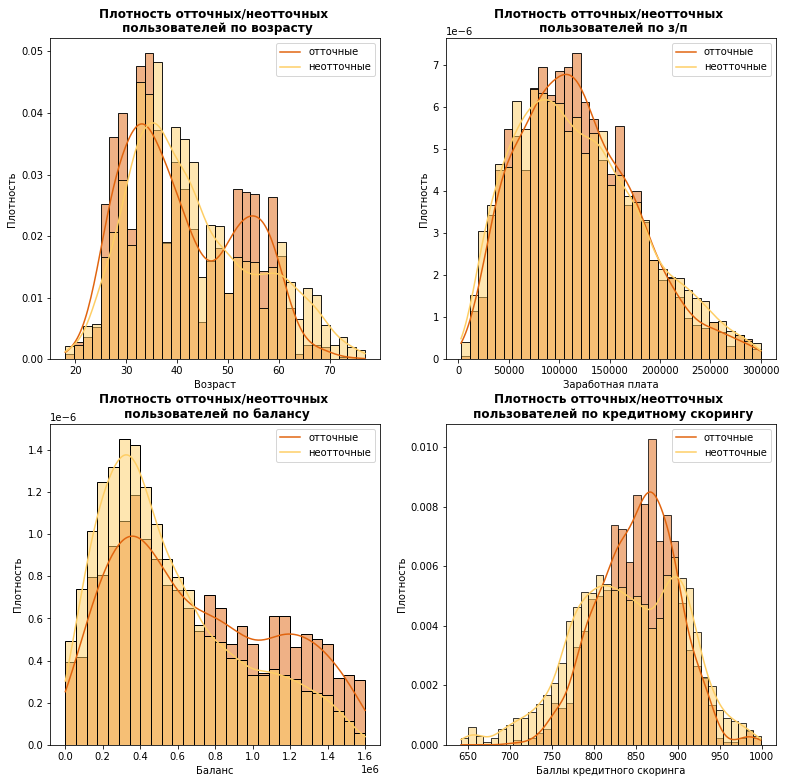

In [50]:
plt.figure(figsize=(13, 13))

plt.subplot(2, 2, 1)
sns.histplot(x='age',
             data=vip_no,
             palette='YlOrBr',
             hue='churn',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.legend(['отточные', 'неотточные'])
plt.title('Плотность отточных/неотточных \n пользователей по возрасту', weight='bold')

plt.subplot(2, 2, 2)
sns.histplot(x='est_salary',
             data=vip_no,
             palette='YlOrBr',
             hue='churn',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Заработная плата')
plt.ylabel('Плотность')
plt.legend(['отточные', 'неотточные'])
plt.title('Плотность отточных/неотточных \n пользователей по з/п', weight='bold')

plt.subplot(2, 2, 3)
sns.histplot(x='balance',
             data=vip_no,
             palette='YlOrBr',
             hue='churn',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Баланс')
plt.ylabel('Плотность')
plt.legend(['отточные', 'неотточные'])
plt.title('Плотность отточных/неотточных \n пользователей по балансу', weight='bold')

plt.subplot(2, 2, 4)
sns.histplot(x='score',
             data=vip_no,
             palette='YlOrBr',
             hue='churn',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Плотность')
plt.legend(['отточные', 'неотточные'])
plt.title(
    'Плотность отточных/неотточных \n пользователей по кредитному скорингу', weight='bold');

**Вывод**
- большая часть отточных пользователей из Ярославля;
- среди отточных пользователей доля владельцев кредитных карт  больше доли невладельцев;
- среди отточных пользователей мужчин больше, чем женщин;
- среди отточных пользователей больше активных;
- отточных пользователей с баллами собственности 4 и 5 больше всего, а меньше всего с 7-9;
- отточных пользователей с двумя продуктами больше всего;
- возраст оттточных пользователей с 25 до 40 лет. При этом пользователи от 50 до 60 тоже часто перестают пользоваться банком, а вот пользователи старше 60 лет редко имеют признак оттока;
- у отточных пользователей зарплата больше 100 000 тыс., а вот пользователи, которые остаются чаще всего имеют з/п от 0 до 75 000 тыс;
- У большинства неотточных пользователей на балансе от 0 до 700 000 тыс., при этом пользователи с высоким балансом (от 700 000 до 1 600 000) в большинтве своем отточные;
- среди отточных пользователей много пользователей с баллами скоринга от 825 до 950.

### Корреляция признаков

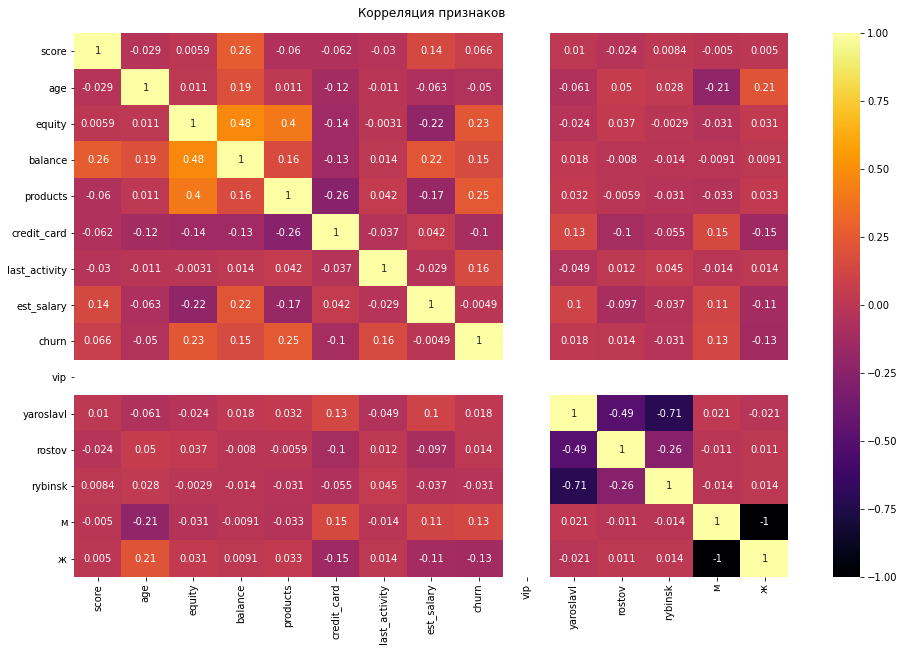

In [51]:
df['yaroslavl'] = df['city'] == 'Ярославль'
df['rostov'] = df['city'] == 'Ростов'
df['rybinsk'] = df['city'] == 'Рыбинск'
df['м'] = df['gender'] == 'М'
df['ж'] = df['gender'] == 'Ж'

df_cor = df.drop(['user_id', 'city', 'gender'],
                 axis=1)
vip_no = df_cor.query('vip == 0')

plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(vip_no.corr(),
                      vmin=-1,
                      vmax=1,
                      annot=True,
                      cmap='inferno')

heatmap.set_title('Корреляция признаков', fontdict={'fontsize': 12}, pad=16);

**Вывод**

Явных зависимостей не наблюдается. Есть некоторая положительная корреляция между баллами собственности и балансом (0.48), количеством продуктов и баллами собственности (0.4), балансом и баллами скоринга (0.26).

## Сегментация
### Портрет VIP-пользователей банка как отдельного сегмента

In [52]:
print(
    'Процент отточных пользователей среди VIP-пользователей:',
    round(
        df.query('vip == 1 & churn == 1')['user_id'].count() /
        df.query('vip == 1')['user_id'].count() * 100))

Процент отточных пользователей среди VIP-пользователей: 32


,city,churn,user_id,churn_%,churn_no_%
0,Ростов,28,59,0.47,0.53
1,Рыбинск,65,221,0.29,0.71
2,Ярославль,212,683,0.31,0.69


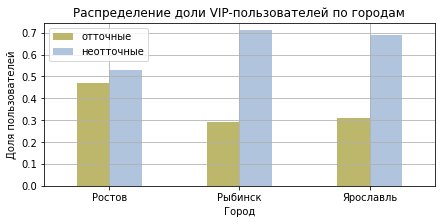

In [53]:
df_group = df.query('vip == 1').pivot_table(index='city',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='city',
              y=['churn_%','churn_no_%'],
              kind='bar',
              figsize=(7, 3),
              color=['#BDB76B','#B0C4DE'],
              fontsize=10,
              grid=True)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Город')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли VIP-пользователей по городам');

,credit_card,churn,user_id,churn_%,churn_no_%
0,0,177,378,0.47,0.53
1,1,128,585,0.22,0.78


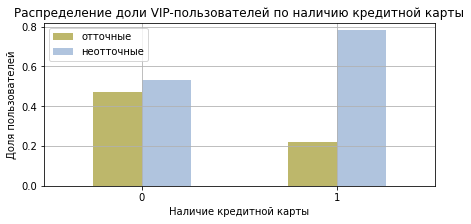

In [54]:
df_group = df.query('vip == 1').pivot_table(index='credit_card',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='credit_card',
              y=['churn_%', 'churn_no_%'],
              kind='bar',
              figsize=(7, 3),
              color=['#BDB76B','#B0C4DE'],
              fontsize=10,
              grid=True)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли VIP-пользователей по наличию кредитной карты');

,gender,churn,user_id,churn_%,churn_no_%
0,Ж,88,387,0.23,0.77
1,М,217,576,0.38,0.62


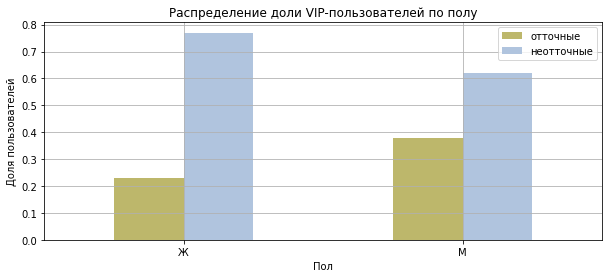

In [55]:
df_group = df.query('vip == 1').pivot_table(index='gender',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='gender',
              y=['churn_%', 'churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#BDB76B','#B0C4DE'],
              fontsize=10,
              grid=True)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Пол')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли VIP-пользователей по полу');

,last_activity,churn,user_id,churn_%,churn_no_%
0,0,92,457,0.20,0.80
1,1,213,506,0.42,0.58


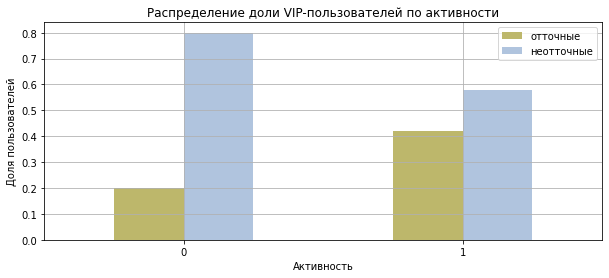

In [56]:
df_group = df.query('vip == 1').pivot_table(index='last_activity',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='last_activity',
              y=['churn_%', 'churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#BDB76B','#B0C4DE'],
              fontsize=10,
              grid=True)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Активность')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли VIP-пользователей по активности');

,equity,churn,user_id,churn_%,churn_no_%
0,0,5,333,0.02,0.98
1,1,2,25,0.08,0.92
2,2,15,35,0.43,0.57
3,3,42,90,0.47,0.53
4,4,91,173,0.53,0.47
5,5,127,274,0.46,0.54
6,6,16,22,0.73,0.27
7,7,4,8,0.50,0.50
8,8,2,2,1.00,0.00
9,9,1,1,1.00,0.00


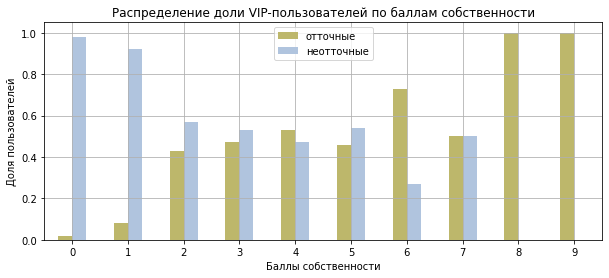

In [57]:
df_group = df.query('vip == 1').pivot_table(index='equity',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='equity',
              y=['churn_%', 'churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#BDB76B','#B0C4DE'],
              fontsize=10,
              grid=True)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Баллы собственности')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли VIP-пользователей по баллам собственности');

,products,churn,user_id,churn_%,churn_no_%
0,1,13,338,0.04,0.96
1,2,140,396,0.35,0.65
2,3,53,116,0.46,0.54
3,4,99,113,0.88,0.12


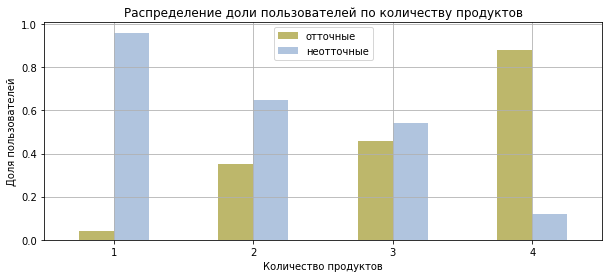

In [58]:
df_group = df.query('vip == 1').pivot_table(index='products',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='products',
              y=['churn_%', 'churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#BDB76B','#B0C4DE'],
              fontsize=10,
              grid=True)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Количество продуктов')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по количеству продуктов');

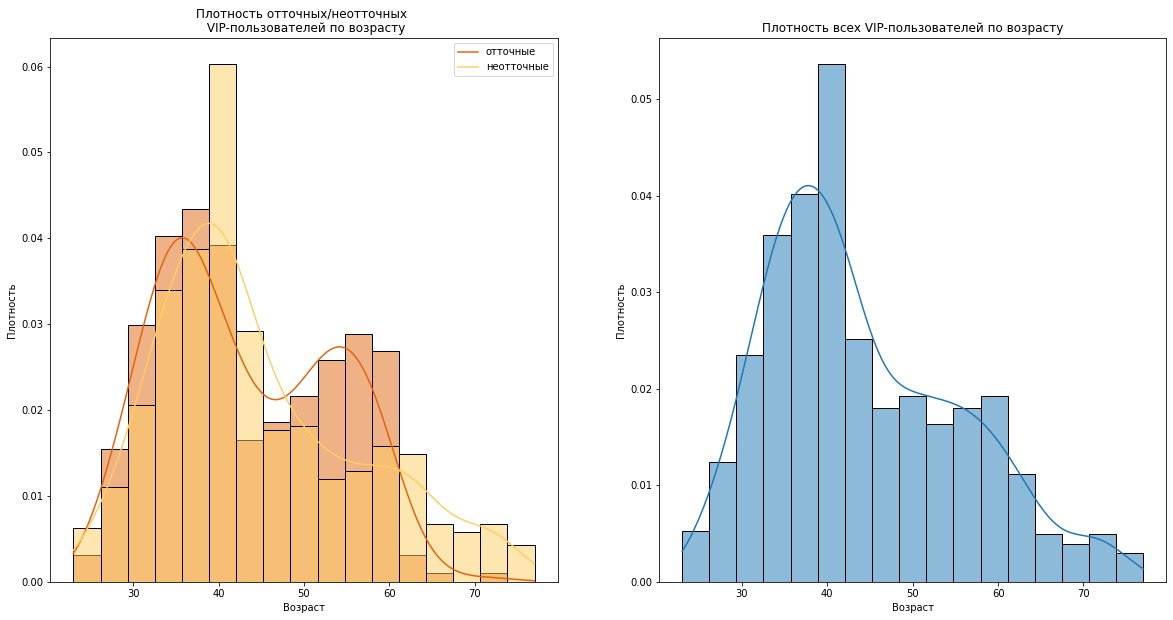

In [59]:
vip = df.query('vip == 1')
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.histplot(x='age',
             data=vip,
             palette='YlOrBr',
             hue='churn',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.legend(['отточные', 'неотточные'])
plt.title('Плотность отточных/неотточных \n VIP-пользователей по возрасту')

plt.subplot(1, 2, 2)
sns.histplot(x='age',
             data=vip,
             stat='density',
             palette='rocket',
             kde=True,
             common_norm=False)
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.title('Плотность всех VIP-пользователей по возрасту');

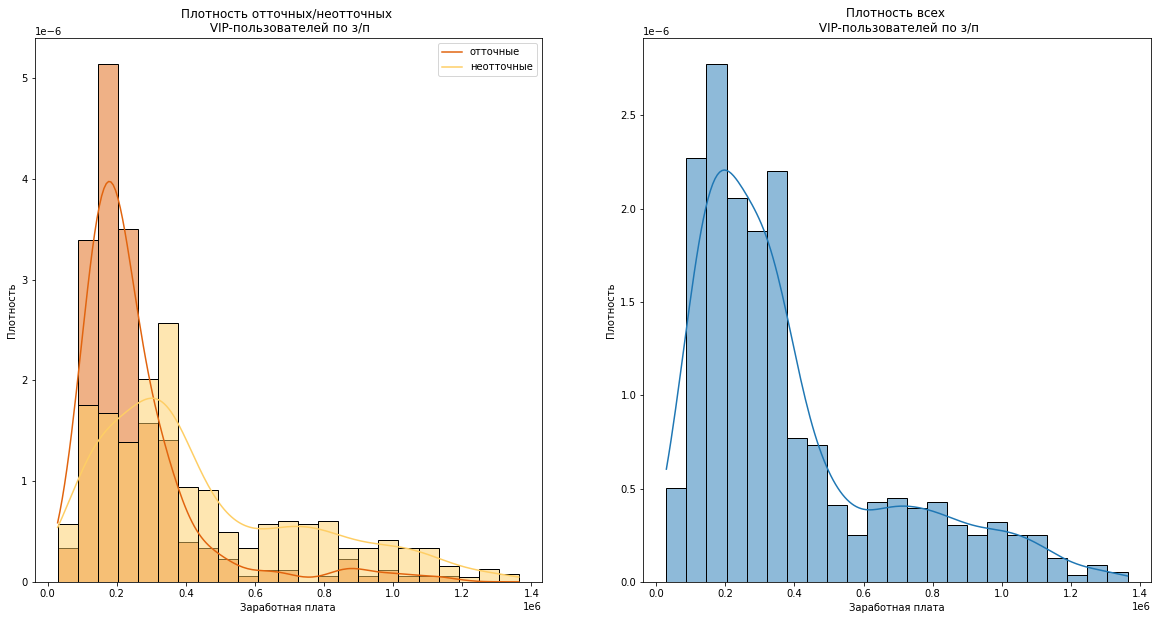

In [60]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.histplot(x='est_salary',
             data=vip,
             palette='YlOrBr',
             hue='churn',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Заработная плата')
plt.ylabel('Плотность')
plt.legend(['отточные', 'неотточные'])
plt.title('Плотность отточных/неотточных \n VIP-пользователей по з/п')

plt.subplot(1, 2, 2)
sns.histplot(x='est_salary',
             data=vip,
             palette='husl',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Заработная плата')
plt.ylabel('Плотность')
plt.title('Плотность всех \n VIP-пользователей по з/п');

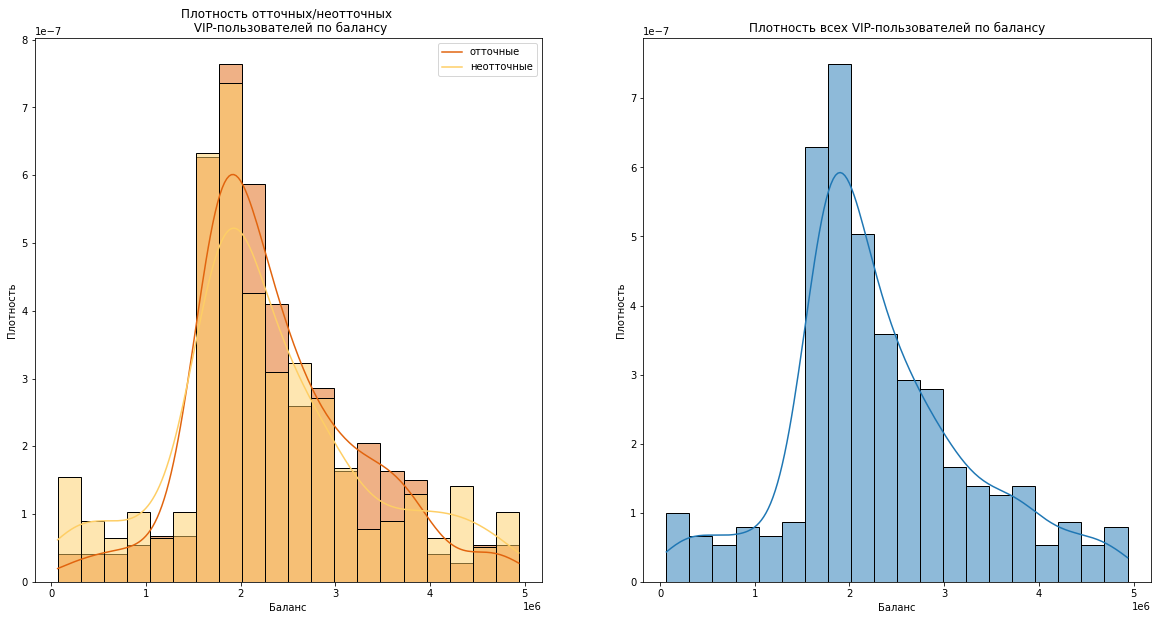

In [61]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.histplot(x='balance',
             data=vip,
             palette='YlOrBr',
             hue='churn',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Баланс')
plt.ylabel('Плотность')
plt.legend(['отточные', 'неотточные'])
plt.title('Плотность отточных/неотточных \n VIP-пользователей по балансу')

plt.subplot(1, 2, 2)
sns.histplot(x='balance',
             data=vip,
             palette='husl',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Баланс')
plt.ylabel('Плотность')
plt.title('Плотность всех VIP-пользователей по балансу');

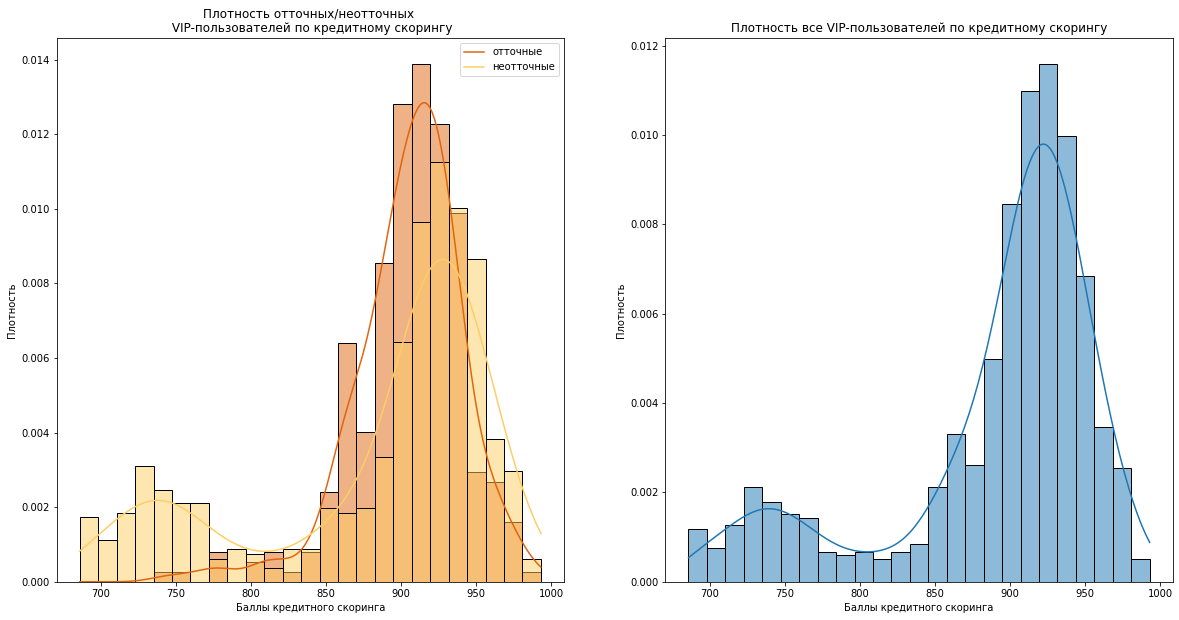

In [62]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.histplot(x='score',
             data=vip,
             palette='YlOrBr',
             hue='churn',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Плотность')
plt.legend(['отточные', 'неотточные'])
plt.title('Плотность отточных/неотточных \n VIP-пользователей по кредитному скорингу')

plt.subplot(1, 2, 2)
sns.histplot(x='score',
             data=vip,
             palette='husl',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Плотность')
plt.title('Плотность все VIP-пользователей по кредитному скорингу');

**Вывод**
- среди VIP-пользователей также больше всего пользователей из Ярославля;
- больше пользователей, у которых есть кредитные карты, а вот  отточными чаще являюься пользователи без крединтых карт; 
- мужчин больше, чем женщин (отточных тоже);
- отточных больше среди активных;
- больше всего признак оттока имеют пользователи с баллами собственности 2-7; Среди пользователей с 0 баллами отток минимальный, а у пользователей с баллами собственности 2 и 4 половина отточных;
- пользователи, которые владели 4 продуктами банка почти все ушли;
- много отточных пользователей возрастом 30-40 лет и 50-60 лет;
- в данном сегменте у пользователей очень высокие баллы скоринга.

#### Корреляция VIP-пользователей

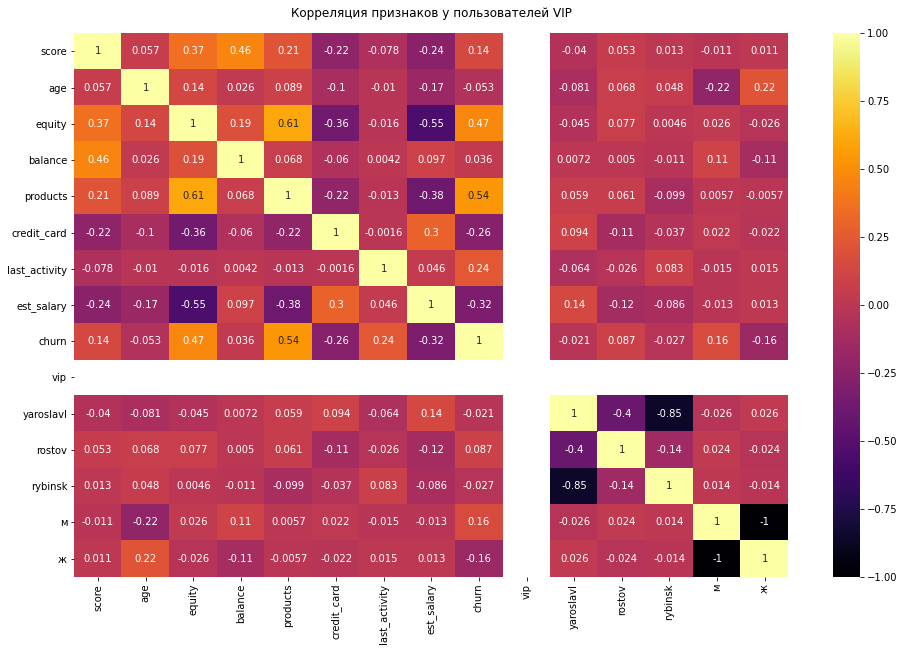

In [63]:
vip = df_cor.query('vip == 1')
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(vip.corr(), vmin=-1, vmax=1, annot=True, cmap='inferno')

heatmap.set_title('Корреляция признаков у пользователей VIP',
                  fontdict={'fontsize': 12},
                  pad=16);

Среди VIP-пользователей прослеживается некоторая зависимость признаков:
* прямая заметная корреляция между количеством продуктов и баллами собственности (0.61);
* прямая заметная корреляция между признаком оттока и количеством продуктов;
* обратная заметная корреляция между з/п и баллами собственности.

### Сегментация пользователей по количеству продуктов

Сегментируем пользователей по количеству продуктов, так как у данного признака самая большая положительная корреляция с признаком оттока. 

In [64]:
products_1 = df.query('products == 1 & vip ==0')
products_2 = df.query('products == 2 & vip ==0')
products_3 = df.query('products == 3 & vip ==0')
products_4 = df.query('products == 4 & vip ==0')

#### Сегмент № 1

In [65]:
print('Процент оттока в данном сегменте:',
      round(products_1['churn'].sum() * 100 / products_1['user_id'].count()))
print('Среднее:')
display(round(products_1[['score', 'age', 'equity', 'est_salary', 'balance']].mean()))

Процент оттока в данном сегменте: 7
Среднее:


score            853.0
age               42.0
equity             1.0
est_salary    136619.0
balance       491645.0
dtype: float64

,city,churn,user_id,churn_%,churn_no_%
0,Ростов,49,430,0.11,0.89
1,Рыбинск,50,763,0.07,0.93
2,Ярославль,116,1764,0.07,0.93


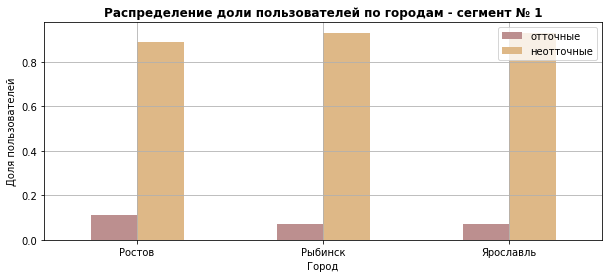

In [66]:
df_group = products_1.pivot_table(index='city',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='city',
              y=['churn_%','churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#BC8F8F','#DEB887'],
              fontsize=10,
              grid=True)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Город')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по городам - сегмент № 1',  weight='bold');


,gender,churn,user_id,churn_%,churn_no_%
0,Ж,57,1374,0.04,0.96
1,М,158,1583,0.10,0.90


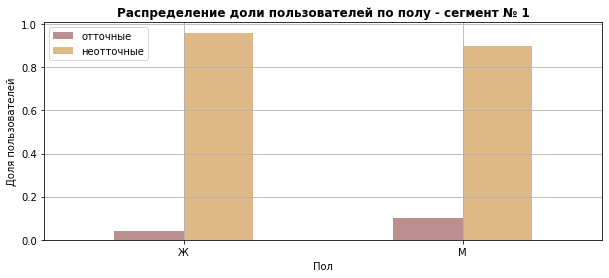

In [67]:
df_group = products_1.pivot_table(index='gender',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='gender',
              y=['churn_%','churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#BC8F8F','#DEB887'],
              fontsize=10,
              grid=True)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Пол')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по полу - сегмент № 1',  weight='bold');


,credit_card,churn,user_id,churn_%,churn_no_%
0,0,23,406,0.06,0.94
1,1,192,2551,0.08,0.92


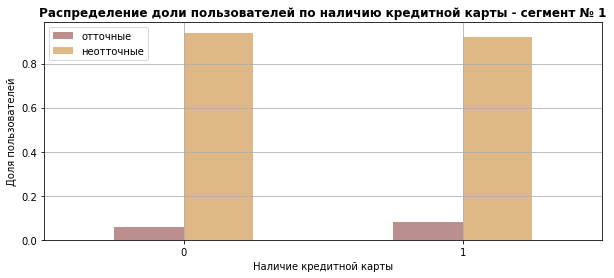

In [68]:
df_group = products_1.pivot_table(index='credit_card',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='credit_card',
              y=['churn_%','churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#BC8F8F','#DEB887'],
              fontsize=10,
              grid=True)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по наличию кредитной карты - сегмент № 1',  weight='bold');

,last_activity,churn,user_id,churn_%,churn_no_%
0,0,77,1416,0.05,0.95
1,1,138,1541,0.09,0.91


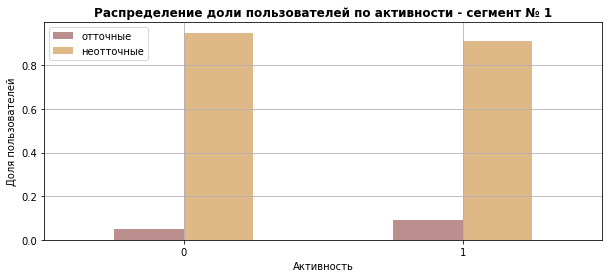

In [69]:
df_group = products_1.pivot_table(index='last_activity',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='last_activity',
              y=['churn_%', 'churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#BC8F8F','#DEB887'],
              fontsize=10,
              grid=True)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Активность')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по активности - сегмент № 1',  weight='bold');

,equity,churn,user_id,churn_%,churn_no_%
0,0,32,1670,0.02,0.98
1,1,18,241,0.07,0.93
2,2,25,187,0.13,0.87
3,3,41,274,0.15,0.85
4,4,41,278,0.15,0.85
5,5,47,265,0.18,0.82
6,6,6,24,0.25,0.75
7,7,4,15,0.27,0.73
8,8,0,2,0.00,1.00
9,9,1,1,1.00,0.00


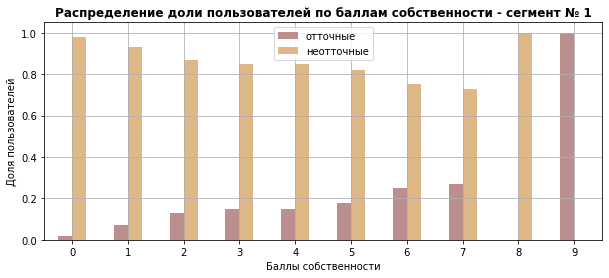

In [70]:
df_group = products_1.pivot_table(index='equity',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='equity',
              y=['churn_%', 'churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#BC8F8F','#DEB887'],
              fontsize=10,
              grid=True)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Баллы собственности')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по баллам собственности - сегмент № 1',  weight='bold');

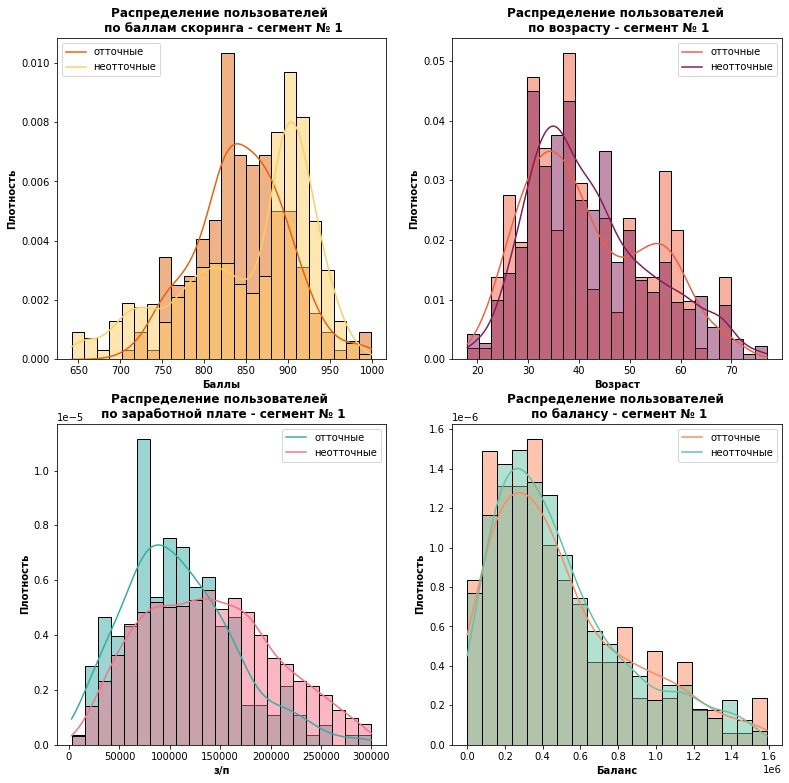

In [71]:
plt.figure(figsize=(13, 13))
plt.subplot(2,2,1)
sns.histplot(x='score',
             data=products_1,
             palette='YlOrBr',
             hue='churn',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Баллы', weight='bold')
plt.ylabel('Плотность', weight='bold')
plt.legend(['отточные', 'неотточные'])
plt.title(
    'Распределение пользователей \n по баллам скоринга - сегмент № 1',
    weight='bold')


plt.subplot(2,2,2)
sns.histplot(x='age',
             data=products_1,
             palette='rocket',
             hue='churn',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Возраст', weight='bold')
plt.ylabel('Плотность', weight='bold')
plt.legend(['отточные', 'неотточные'])
plt.title(
    'Распределение пользователей \n по возрасту - сегмент № 1',
    weight='bold')


plt.subplot(2,2,3)
sns.histplot(x='est_salary',
             data=products_1,
             palette='husl',
             hue='churn',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('з/п', weight='bold')
plt.ylabel('Плотность', weight='bold')
plt.legend(['отточные', 'неотточные'])
plt.title(
    'Распределение пользователей \n по заработной плате - сегмент № 1',
    weight='bold')


plt.subplot(2,2,4)
sns.histplot(x='balance',
             data=products_1,
             palette='Set2',
             hue='churn',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Баланс', weight='bold')
plt.ylabel('Плотность', weight='bold')
plt.legend(['отточные', 'неотточные'])
plt.title(
    'Распределение пользователей \n по балансу - сегмент № 1',
    weight='bold');

**Выводы:**
- пользователи данного сегмента составляют 34 % от всех пользователей;
- процент оттока в данном сегменте 7 %;
- среди пользователей 1 сегмента тоже преобладают жители Ярославля, а вот отточных пользователей больше в Ростове;
- мужчин в данном сегменте чуть больше, чем женщин;
- пользователей, которые пользуются кредитными картами в 5 раз больше;
- в данном сегменте пользователи по признаку активности распределены примерно поровну, а вот отточных пользователей больше активных;
- у большинства пользователей баллы собственности равны 0. Отточных чуть больше с баллами собственности 5;
- баллы скоринга среди отточных пользователей сегмента составляют 800-875;
- возраст пользователей от 30 до 40, при этом есть прирост отточных пользователей в возрасте от 50 до 60.

#### Сегмент № 2

In [72]:
print('Процент оттока в данном сегменте:',
      round(products_2['churn'].sum() * 100 / products_2['user_id'].count()))

print('Среднее:')
display(round(products_2[['score', 'age', 'equity', 'est_salary', 'balance']].mean()))

Процент оттока в данном сегменте: 17
Среднее:


score            838.0
age               43.0
equity             3.0
est_salary    111032.0
balance       568556.0
dtype: float64

,city,churn,user_id,churn_%,churn_no_%
0,Ростов,135,768,0.18,0.82
1,Рыбинск,221,1430,0.15,0.85
2,Ярославль,443,2451,0.18,0.82


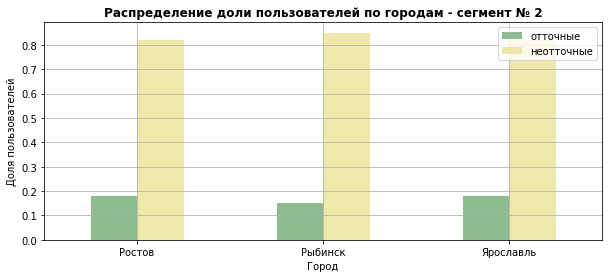

In [73]:
df_group = products_2.pivot_table(index='city',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='city',
              y=['churn_%','churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#8FBC8F','#EEE8AA'],
              fontsize=10,
              grid=True)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Город')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по городам - сегмент № 2',  weight='bold');

,credit_card,churn,user_id,churn_%,churn_no_%
0,0,396,1658,0.24,0.76
1,1,403,2991,0.13,0.87


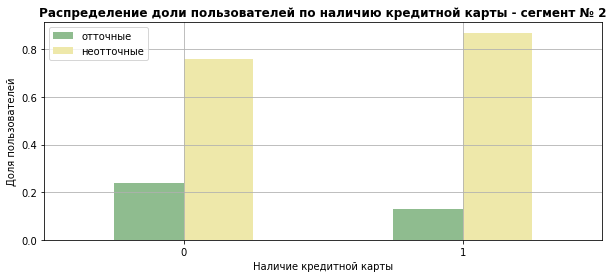

In [74]:
df_group = products_2.pivot_table(index='credit_card',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='credit_card',
              y=['churn_%','churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#8FBC8F','#EEE8AA'],
              fontsize=10,
              grid=True)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по наличию кредитной карты - сегмент № 2',  weight='bold');

,gender,churn,user_id,churn_%,churn_no_%
0,Ж,293,2483,0.12,0.88
1,М,506,2166,0.23,0.77


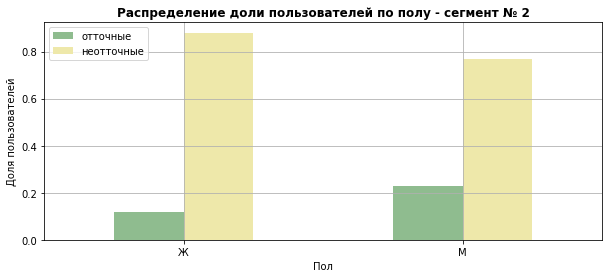

In [75]:
df_group = products_2.pivot_table(index='gender',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='gender',
              y=['churn_%','churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#8FBC8F','#EEE8AA'],
              fontsize=10,
              grid=True)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Пол')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по полу - сегмент № 2',  weight='bold');


,last_activity,churn,user_id,churn_%,churn_no_%
0,0,211,2256,0.09,0.91
1,1,588,2393,0.25,0.75


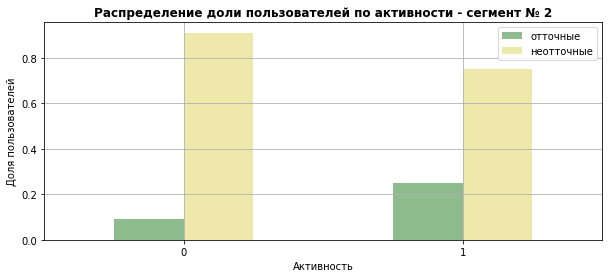

In [76]:
df_group = products_2.pivot_table(index='last_activity',
                                  aggfunc={
                                      'user_id': 'count',
                                      'churn': 'sum'
                                  }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='last_activity',
              y=['churn_%', 'churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#8FBC8F', '#EEE8AA'],
              fontsize=10,
              grid=True)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360)
plt.xlabel('Активность')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по активности - сегмент № 2',
          weight='bold');

,equity,churn,user_id,churn_%,churn_no_%
0,0,36,500,0.07,0.93
1,1,51,424,0.12,0.88
2,2,84,681,0.12,0.88
3,3,159,915,0.17,0.83
4,4,194,1015,0.19,0.81
5,5,237,991,0.24,0.76
6,6,17,73,0.23,0.77
7,7,16,34,0.47,0.53
8,8,2,9,0.22,0.78
9,9,3,7,0.43,0.57


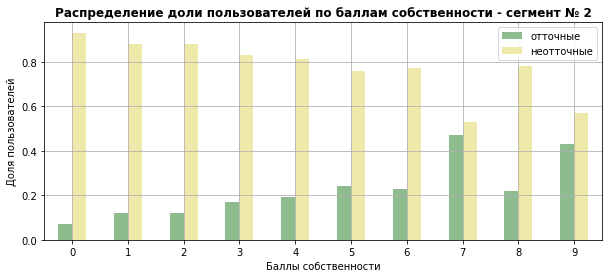

In [77]:
df_group = products_2.pivot_table(index='equity',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='equity',
              y=['churn_%', 'churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#8FBC8F','#EEE8AA'],
              fontsize=10,
              grid=True)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Баллы собственности')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по баллам собственности - сегмент № 2',  weight='bold');

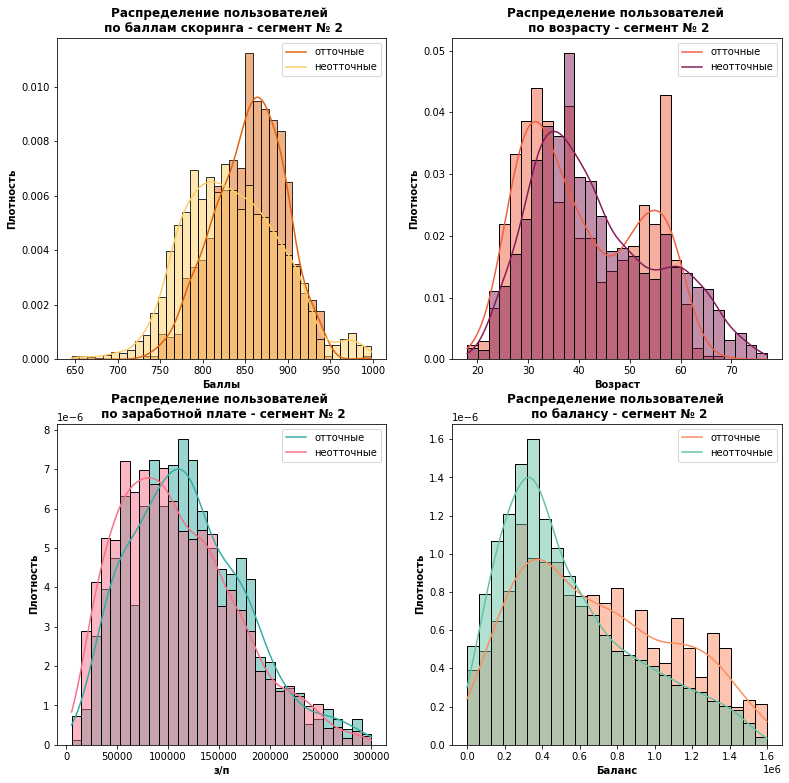

In [78]:
plt.figure(figsize=(13, 13))
plt.subplot(2,2,1)
sns.histplot(x='score',
             data=products_2,
             palette='YlOrBr',
             hue='churn',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Баллы', weight='bold')
plt.ylabel('Плотность', weight='bold')
plt.legend(['отточные', 'неотточные'])
plt.title(
    'Распределение пользователей \n по баллам скоринга - сегмент № 2',
    weight='bold')


plt.subplot(2,2,2)
sns.histplot(x='age',
             data=products_2,
             palette='rocket',
             hue='churn',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Возраст', weight='bold')
plt.ylabel('Плотность', weight='bold')
plt.legend(['отточные', 'неотточные'])
plt.title(
    'Распределение пользователей \n по возрасту - сегмент № 2',
    weight='bold')


plt.subplot(2,2,3)
sns.histplot(x='est_salary',
             data=products_2,
             palette='husl',
             hue='churn',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('з/п', weight='bold')
plt.ylabel('Плотность', weight='bold')
#plt.xlim(0, 2e+05)
plt.legend(['отточные', 'неотточные'])
plt.title(
    'Распределение пользователей \n по заработной плате - сегмент № 2',
    weight='bold')


plt.subplot(2,2,4)
sns.histplot(x='balance',
             data=products_2,
             palette='Set2',
             hue='churn',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Баланс', weight='bold')
plt.ylabel('Плотность', weight='bold')
plt.legend(['отточные', 'неотточные'])
plt.title(
    'Распределение пользователей \n по балансу - сегмент № 2',
    weight='bold');

**Выводы:**
* В данный сегмент входит 51 % пользователей от общего числа;
* отточных тут 54 % от общего числа и 17 % от числа данного сегмента;
* большая часть пользователей из Ярославля;
* женщин в данном сегменте чуть больше, чем мужчин, но мужчины чаще имеют признак оттока;
* активные пользователи чаще имеют признак оттока;
* у пользователей данного сегмента чаще всего баллы собственности 3-5. Самое большое число пользователей с баллами собственности 7 и 9;
* в этом сегменте много отточных пользователей с высоким скорингом;
* возраст пользователей от 30 до 40, при этом есть прирост отточных пользователей в возрасте от 50 до 60;
* средняя з/п 111 000 тыс;
* у многих отточных на балансе от 400 000 тыс. до 1 600 000 тыс.

#### Сегмент № 3

In [79]:
print('Процент оттока в данном сегменте:',
      round(products_3['churn'].sum() * 100 / products_3['user_id'].count()))
print('Среднее:')
display(round(products_3[['score', 'age', 'equity', 'est_salary', 'balance']].mean()))

Процент оттока в данном сегменте: 26
Среднее:


score            828.0
age               45.0
equity             3.0
est_salary    105858.0
balance       684884.0
dtype: float64

,city,churn,user_id,churn_%,churn_no_%
0,Ростов,25,92,0.27,0.73
1,Рыбинск,32,153,0.21,0.79
2,Ярославль,178,654,0.27,0.73


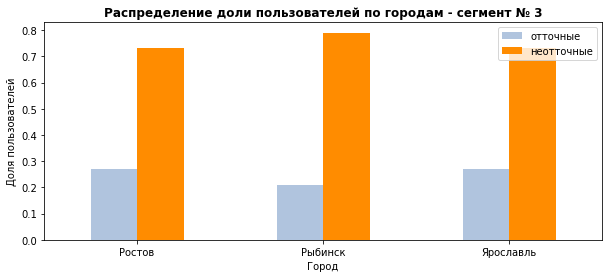

In [80]:
df_group = products_3.pivot_table(index='city',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='city',
              y=['churn_%','churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#B0C4DE','#FF8C00'],
              fontsize=10)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Город')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по городам - сегмент № 3',  weight='bold');


,credit_card,churn,user_id,churn_%,churn_no_%
0,0,142,552,0.26,0.74
1,1,93,347,0.27,0.73


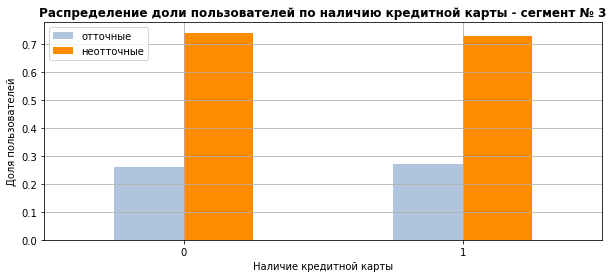

In [81]:
df_group = products_3.pivot_table(index='credit_card',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='credit_card',
              y=['churn_%','churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#B0C4DE','#FF8C00'],
              fontsize=10,
              grid=True)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по наличию кредитной карты - сегмент № 3',  weight='bold');

,gender,churn,user_id,churn_%,churn_no_%
0,Ж,108,526,0.21,0.79
1,М,127,373,0.34,0.66


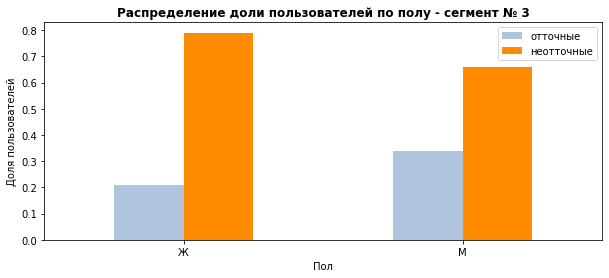

In [82]:
df_group = products_3.pivot_table(index='gender',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='gender',
              y=['churn_%','churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#B0C4DE','#FF8C00'],
              fontsize=10)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Пол')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по полу - сегмент № 3',  weight='bold');

,last_activity,churn,user_id,churn_%,churn_no_%
0,0,102,533,0.19,0.81
1,1,133,366,0.36,0.64


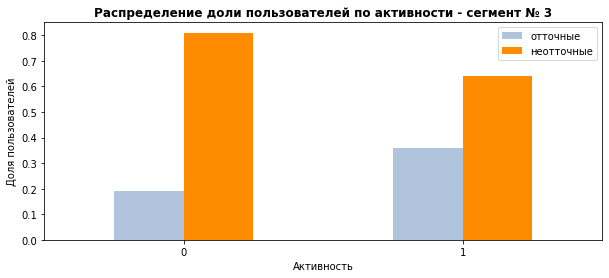

In [83]:
df_group = products_3.pivot_table(index='last_activity',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='last_activity',
              y=['churn_%', 'churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#B0C4DE','#FF8C00'],
              fontsize=10)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Активность')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по активности - сегмент № 3',  weight='bold');

,equity,churn,user_id,churn_%,churn_no_%
0,0,9,52,0.17,0.83
1,1,14,65,0.22,0.78
2,2,22,109,0.20,0.80
3,3,40,183,0.22,0.78
4,4,67,240,0.28,0.72
5,5,73,219,0.33,0.67
6,6,6,20,0.30,0.70
7,7,3,8,0.38,0.62
8,8,0,1,0.00,1.00
9,9,1,2,0.50,0.50


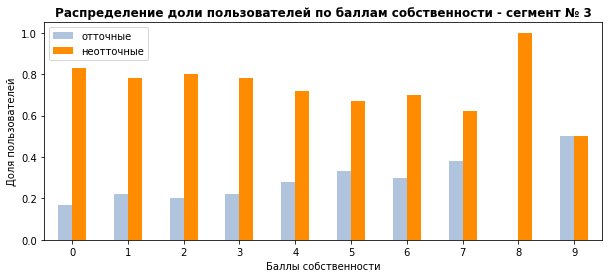

In [84]:
df_group = products_3.pivot_table(index='equity',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='equity',
              y=['churn_%', 'churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#B0C4DE','#FF8C00'],
              fontsize=10)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Баллы собственности')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по баллам собственности - сегмент № 3',  weight='bold');

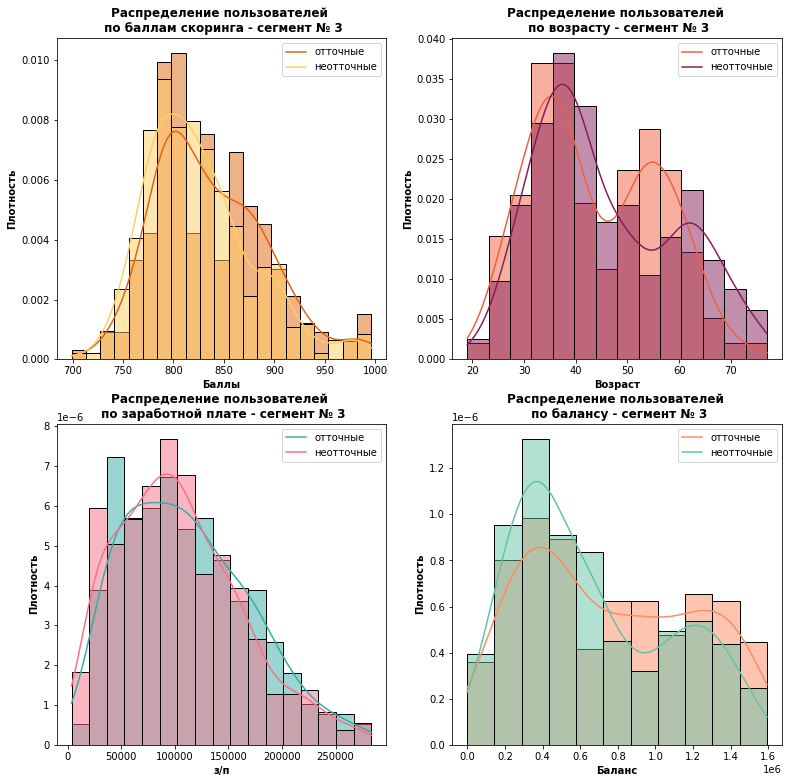

In [85]:
plt.figure(figsize=(13, 13))
plt.subplot(2,2,1)
sns.histplot(x='score',
             data=products_3,
             palette='YlOrBr',
             hue='churn',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Баллы', weight='bold')
plt.ylabel('Плотность', weight='bold')
plt.legend(['отточные', 'неотточные'])
plt.title(
    'Распределение пользователей \n по баллам скоринга - сегмент № 3',
    weight='bold')


plt.subplot(2,2,2)
sns.histplot(x='age',
             data=products_3,
             palette='rocket',
             hue='churn',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Возраст', weight='bold')
plt.ylabel('Плотность', weight='bold')
plt.legend(['отточные', 'неотточные'])
plt.title(
    'Распределение пользователей \n по возрасту - сегмент № 3',
    weight='bold')


plt.subplot(2,2,3)
sns.histplot(x='est_salary',
             data=products_3,
             palette='husl',
             hue='churn',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('з/п', weight='bold')
plt.ylabel('Плотность', weight='bold')
#plt.xlim(0, 2e+05)
plt.legend(['отточные', 'неотточные'])
plt.title(
    'Распределение пользователей \n по заработной плате - сегмент № 3',
    weight='bold')


plt.subplot(2,2,4)
sns.histplot(x='balance',
             data=products_3,
             palette='Set2',
             hue='churn',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Баланс', weight='bold')
plt.ylabel('Плотность', weight='bold')
plt.legend(['отточные', 'неотточные'])
plt.title(
    'Распределение пользователей \n по балансу - сегмент № 3',
    weight='bold');

**Выводы:**
* В данный сегмент входит 17 % пользователей от общего числа;
* отточных тут 10 % от общего числа и 26 % от числа данного сегмента;
* женщин в данном сегменте больше, чем мужчин. Но мужчины чаще имеют признак оттока;
* в данном сегменте преобладают пользователи без кредитных карт;
* в данном сегменте преобладают неактивные пользователи, при этом отточных больше активных;
* у пользователей данного сегмента чаще всего баллы собственности 3-5, так же пока только в этом сегменте есть пользователи с баллами собственности 7;
* среди отточных пользователей есть два возрастной пика: 35-40 лет. Пользователи в возрасте от 50 до 60 предпочитают не покидать банк;
* средняя зарплата такая же как и во втором сегменте - 105 000 тыс;
* средний баланс 684 884 тыс;
* баллы скоринга распределены равномерно.

#### Сегмент № 4

In [86]:
print('Процент оттока в данном сегменте:',
      round(products_4['churn'].sum() * 100 / products_4['user_id'].count()))
print('Среднее:')
display(round(products_4[['score', 'age', 'equity', 'est_salary', 'balance']].mean()))

Процент оттока в данном сегменте: 54
Среднее:


score            865.0
age               39.0
equity             4.0
est_salary    106447.0
balance       733326.0
dtype: float64

,city,churn,user_id,churn_%,churn_no_%
0,Ростов,26,55,0.47,0.53
1,Рыбинск,44,76,0.58,0.42
2,Ярославль,113,209,0.54,0.46


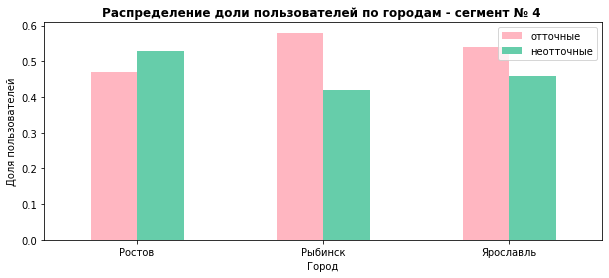

In [87]:
df_group = products_4.pivot_table(index='city',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='city',
              y=['churn_%','churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#FFB6C1','#66CDAA'],
              fontsize=10)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Город')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по городам - сегмент № 4 ', weight='bold');


,credit_card,churn,user_id,churn_%,churn_no_%
0,0,42,124,0.34,0.66
1,1,141,216,0.65,0.35


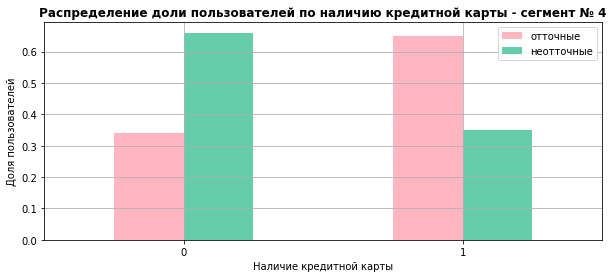

In [88]:
df_group = products_4.pivot_table(index='credit_card',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='credit_card',
              y=['churn_%','churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#FFB6C1','#66CDAA'],
              fontsize=10,
              grid=True)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по наличию кредитной карты - сегмент № 4',  weight='bold');

,gender,churn,user_id,churn_%,churn_no_%
0,Ж,60,129,0.47,0.53
1,М,123,211,0.58,0.42


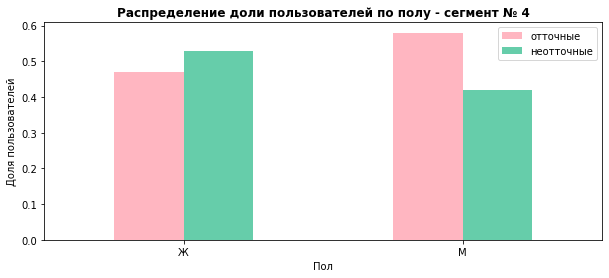

In [89]:
df_group = products_4.pivot_table(index='gender',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='gender',
              y=['churn_%','churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#FFB6C1','#66CDAA'],
              fontsize=10)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Пол')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по полу - сегмент № 4',  weight='bold');


,last_activity,churn,user_id,churn_%,churn_no_%
0,0,44,49,0.90,0.10
1,1,139,291,0.48,0.52


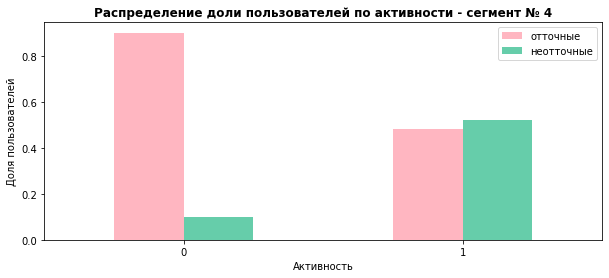

In [90]:
df_group = products_4.pivot_table(index='last_activity',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='last_activity',
              y=['churn_%', 'churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#FFB6C1','#66CDAA'],
              fontsize=10)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Активность')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по активности - сегмент № 4',  weight='bold');

,equity,churn,user_id,churn_%,churn_no_%
0,0,5,10,0.50,0.50
1,1,6,12,0.50,0.50
2,2,18,29,0.62,0.38
3,3,25,47,0.53,0.47
4,4,48,95,0.51,0.49
5,5,62,113,0.55,0.45
6,6,9,18,0.50,0.50
7,7,7,12,0.58,0.42
8,8,2,2,1.00,0.00
9,9,1,2,0.50,0.50


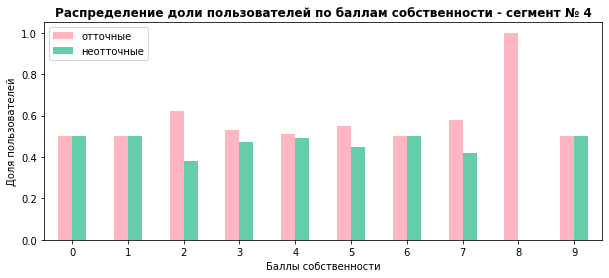

In [91]:
df_group = products_4.pivot_table(index='equity',
                          aggfunc={
                              'user_id': 'count',
                              'churn': 'sum'
                          }).reset_index()
df_group['churn_%'] = round(df_group['churn'] / df_group['user_id'], 2)
df_group['churn_no_%'] = round(
    (df_group['user_id'] - df_group['churn']) / df_group['user_id'], 2)
display(df_group)

df_group.plot(x='equity',
              y=['churn_%', 'churn_no_%'],
              kind='bar',
              figsize=(10, 4),
              color=['#FFB6C1','#66CDAA'],
              fontsize=10)
plt.legend(['отточные', 'неотточные'])
plt.xticks(rotation=360) 
plt.xlabel('Баллы собственности')
plt.ylabel('Доля пользователей')
plt.title('Распределение доли пользователей по баллам собственности - сегмент № 4',  weight='bold');

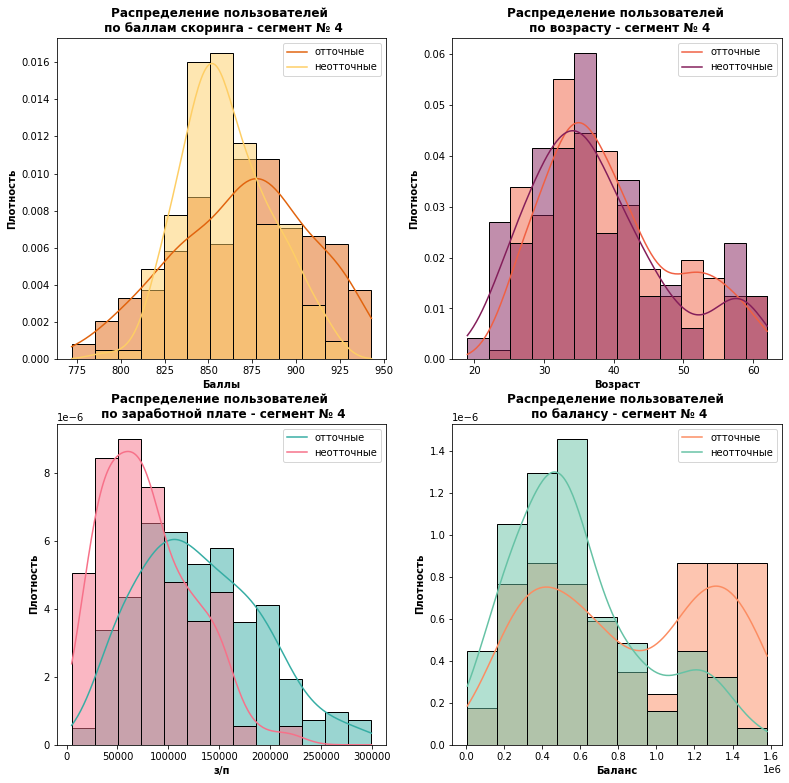

In [92]:
plt.figure(figsize=(13, 13))
plt.subplot(2,2,1)
sns.histplot(x='score',
             data=products_4,
             palette='YlOrBr',
             hue='churn',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Баллы', weight='bold')
plt.ylabel('Плотность', weight='bold')
plt.legend(['отточные', 'неотточные'])
plt.title(
    'Распределение пользователей \n по баллам скоринга - сегмент № 4',
    weight='bold')


plt.subplot(2,2,2)
sns.histplot(x='age',
             data=products_4,
             palette='rocket',
             hue='churn',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Возраст', weight='bold')
plt.ylabel('Плотность', weight='bold')
plt.legend(['отточные', 'неотточные'])
plt.title(
    'Распределение пользователей \n по возрасту - сегмент № 4',
    weight='bold')


plt.subplot(2,2,3)
sns.histplot(x='est_salary',
             data=products_4,
             palette='husl',
             hue='churn',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('з/п', weight='bold')
plt.ylabel('Плотность', weight='bold')
#plt.xlim(0, 2e+05)
plt.legend(['отточные', 'неотточные'])
plt.title(
    'Распределение пользователей \n по заработной плате - сегмент № 4',
    weight='bold')


plt.subplot(2,2,4)
sns.histplot(x='balance',
             data=products_4,
             palette='Set2',
             hue='churn',
             stat='density',
             kde=True,
             common_norm=False)
plt.xlabel('Баланс', weight='bold')
plt.ylabel('Плотность', weight='bold')
plt.legend(['отточные', 'неотточные'])
plt.title(
    'Распределение пользователей \n по балансу - сегмент № 4',
    weight='bold');

**Выводы:**
* в данный сегмент входит 5 % пользователей от общего числа (самый малочисленный сегмент);
* отточных тут 16 % от общего числа и 54 % от числа данного сегмента. Самый большой отток среди сегментов; 
* в данном сегменте отточных в Ярославле и Рыбнинске больше половины;
* в данном сегменте больше мужчин, чем женщин (в том числе отточных);
* много отточных пользователей с кредитными картами;
* в данном сегменте преобладают активные пользователи (в том числе среди отточных);
* в данном сегменте преобладают пользователи с кредитными картами;
* у пользователей данного сегмента чаще всего баллы собственности 5, а так же есть пользователи с баллами 7 и 8;
* средний возраст данного сегмента 30-40 лет; 
* средняя зарплата - 106 000 тыс.

## Проверка гипотез
### 

Для проверки гипотез нулевые и альтернативные гипотезы были сформулированы через "равно, не равно", так как являются двусторонними.

Был использован критерий Стьюдента (t-тест), так как он позволяет сравнивать средние значения двух выборок и на основе результатов теста.

Уровень значимость возьмем 0,01. Данный уровень значимости был выбран для более точных результатов экпериментов и большей чувствиельности к отличиям в выбрках.

Сформулируем двустороннюю гипотезу:
- **H0**: баллы собственности пользователей, которые пользуются одним продуктам **равны** баллам собственности пользователей, которые пользуются тремя продуктами. 
- **H1**: баллы собственности пользователей, которые пользуются одним продуктам **не равны** баллам собственности пользователей, которые пользуются тремя продуктами. 

In [93]:
product_age_1 = df[(df['products']==1)]['equity']
product_age_2 = df[(df['products']==3)]['equity']
results = st.ttest_ind(product_age_1, product_age_2, equal_var=False)

alpha = 0.01

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.957554992681705e-229
Отвергаем нулевую гипотезу


**Вывод:** на имеющихся данных, на уровне значимости 1 % есть основания отвергнуть нулевую гипотезу в пользу альтернативы, поэтому можем предположить, что баллы собственности пользователей, которые пользуются одним продуктам **не равны** баллам собственности пользователей, которые пользуются тремя продуктами.

### 

Сформулируем двустороннюю гипотезу:
- **H0**: баллы скоринга пользователей, которые пользуются двумя продуктам **равны** баллам скоринга пользователей, которые пользуются четырьмя продуктами. 
- **H1**: баллы скоринга пользователей, которые пользуются двумя продуктам **не равны** баллам скоринга пользователей, которые пользуются четырьмя продуктами.

In [94]:
product_score_2 = df[(df['products']==2)]['score']
product_score_4 = df[(df['products']==4)]['score']
results = st.ttest_ind(product_score_2, product_score_4, equal_var=False)

alpha = 0.01

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.74407775410181e-52
Отвергаем нулевую гипотезу


**Вывод:** на имеющихся данных, на уровне значимости 1 % есть основания отвергнуть нулевую гипотезу в пользу альтернативы, поэтому можем предположить, что баллы скоринга пользователей, которые пользуются двумя продуктам **не равны** баллам скоринга пользователей, которые пользуются четырьмя продуктами.

## Общий вывод

**В ходе исследования была проделана следующая работа:**

1. **Выполнена предобработка данных для очистки датафрейма.**

2. **Выполнен исследовательский анализ данных, в ходе которого сделаны следующие выводы:**
- банком пользуются в Ярославле, Рыбинске и Ростове. Больше половины пользователей из Ярославля;
- пользователей с кредитными картами в два раза больше;
- примерно половину пользователей составляют мужчины, а вторую половину женщины;
- среди всех пользователей активные и неактивные распределены поровну;
- у многих пользователей баллы собственности равны 0, остальные распределены от 1 до 5 по возрастанию. Незначительная часть имеет баллы от 6 до 9;
- большинство пользователей пользуются одним или двумя продуктами;
- у нас есть пользователи от 20 до 70 лет. Больше всего пользователей возрастом от 30 до 45 лет;
- заработная плата многих пользователей от 75 000 до 125 000 тыс;
- баланс многих пользователей 300 000 - 400 000 тыс;
- баллы скоринга пользователей от 650 до 1000.
3. **Исследованы отточные пользователи, сделаны следующие выводы:**
- больше всего отточных пользователей из Ярославля. На втором месте Рыбинск, на третьем Ростов;
- - среди отточных пользователей доля владельцев кредитных карт больше доли невладельцев;
- среди отточных пользователей мужчин больше, чем женщин;
- среди отточных пользователей больше активных;
- отточных пользователей с баллами собственности 4 и 5 больше всего, а меньше всего с 7-9;
- отточных пользователей с двумя продуктами больше всего (54 %), а меньше всего с одним;
- возраст оттточных пользователей с 25 до 40 лет. При этом пользователи от 50 до 60 тоже часто перестают пользоваться банком, а вот пользователи старше 60 лет редко имеют признак оттока;
- у отточных пользователей зарплата больше 100 000 тыс., а вот пользователи, которые остаются чаще всего имеют з/п от 0 до 75 000 тыс;
- У большинства неотточных пользователей на балансе от 0 до 700 000 тыс., при этом пользователи с высоким балансом (от 700 000 до 1 600 000) в большинтве своем отточные;
- среди отточных пользователей много пользователей с баллами скоринга от 825 до 950.

4. **Произведена сегментация по количеству продуктов, а так же в отдельный сегмент выделены VIP-пользователи:**
|VIP-пользователи| 1 | 2 | 3 | 4 |
|:-----|:-----|:-----|:-----|:-----|
Среди VIP-пользователей также больше всего пользователей из Ярославля; больше пользователей, у которых есть кредитные карты, а вот  отточными чаще являюься пользователи без крединтых карт; мужчин больше, чем женщин (отточных тоже); отточных больше среди активных; больше всего признак оттока имеют пользователи с баллами собственности 2-7; Среди пользователей с 0 баллами отток минимальный, а у пользователей с баллами собственности 2 и 4 половина отточных; пользователи, которые владели 4 продуктами банка почти все ушли; много отточных пользователей возрастом 30-40 лет и 50-60 лет; в данном сегменте у пользователей очень высокие баллы скоринга.|Пользователи данного сегмента составляют 34 % от всех пользователей; процент оттока в данном сегменте 7 %; среди пользователей 1 сегмента тоже преобладают жители Ярославля, а вот отточных пользователей больше в Ростове; мужчин в данном сегменте чуть больше, чем женщин; пользователей, которые пользуются кредитными картами в 5 раз больше; в данном сегменте пользователи по признаку активности распределены примерно поровну, а вот отточных пользователей больше активных; у большинства пользователей баллы собственности равны 0. Отточных чуть больше с баллами собственности 5; баллы скоринга среди отточных пользователей сегмента составляют 800-875; возраст пользователей от 30 до 40, при этом есть прирост отточных пользователей в возрасте от 50 до 60.|В данный сегмент входит 51 % пользователей от общего числа; отточных тут 54 % от общего числа и 17 % от числа данного сегмента; большая часть пользователей из Ярославля; женщин в данном сегменте чуть больше, чем мужчин, но мужчины чаще имеют признак оттока; активные пользователи чаще имеют признак оттока; у пользователей данного сегмента чаще всего баллы собственности 3-5. Самое большое число пользователей с баллами собственности 7 и 9; в этом сегменте много отточных пользователей с высоким скорингом; возраст пользователей от 30 до 40, при этом есть прирост отточных пользователей в возрасте от 50 до 60; средняя з/п 111 000 тыс; у многих отточных на балансе от 400 000 тыс. до 1 600 000 тыс.|В данный сегмент входит 17 % пользователей от общего числа; отточных тут 10 % от общего числа и 26 % от числа данного сегмента; женщин в данном сегменте больше, чем мужчин. Но мужчины чаще имеют признак оттока; в данном сегменте преобладают пользователи без кредитных карт; в данном сегменте преобладают неактивные пользователи, при этом отточных больше активных; у пользователей данного сегмента чаще всего баллы собственности 3-5, так же пока только в этом сегменте есть пользователи с баллами собственности 7; среди отточных пользователей есть два возрастной пика: 35-40 лет. Пользователи в возрасте от 50 до 60 предпочитают не покидать банк; средняя зарплата такая же как и во втором сегменте - 105 000 тыс; средний баланс 684 884 тыс; баллы скоринга распределены равномерно.|В данный сегмент входит 5 % пользователей от общего числа (самый малочисленный сегмент); отточных тут 16 % от общего числа и 54 % от числа данного сегмента. Самый большой отток среди сегментов; в данном сегменте отточных в Ярославле и Рыбнинске больше половины; в данном сегменте больше мужчин, чем женщин (в том числе отточных); много отточных пользователей с кредитными картами; в данном сегменте преобладают активные пользователи (в том числе среди отточных); в данном сегменте преобладают пользователи с кредитными картами; у пользователей данного сегмента чаще всего баллы собственности 5, а так же есть пользователи с баллами 7 и 8; средний возраст данного сегмента 30-40 лет; средняя зарплата - 106 000 тыс.|


5. **Проверены две гипотезы, сделаны следующие выводы:**
- на имеющихся данных, на уровне значимости 1 % есть основания отвергнуть нулевую гипотезу в пользу альтернативы, поэтому можем предположить, что баллы собственности пользователей, которые пользуются одним продуктам не равны баллам собственности пользователей, которые пользуются тремя продуктами;
- на имеющихся данных, на уровне значимости 1 % есть основания отвергнуть нулевую гипотезу в пользу альтернативы, поэтому можем предположить, что баллы скоринга пользователей, которые пользуются двумя продуктам не равны баллам скоринга пользователей, которые пользуются четырьмя продуктами.
6. **Рекомендации:**
**Банки могут предоставлять следующие услуги:** кредитование, ипотека, расчеты, вклады, хранение в ячейках, обмен валют, страховые услуги и др.

| Сегмент|Рекомендации| 
|:----------|:---------|
|VIP-пользователи| предлагать кредитные карты, продукты, которые связаны с собственностью, а так же индивидуальные предложения с большим количеством продуктов.|
| 1  | предлагать данным пользовать ипотечные кредиты, так как у пользователей высокие баллы скоринга, а баллы собственности равны нулю, при это пользователи молодые. Так же у сегмента большой отток активных пользователей, поэтому следует предлагать пользователям индивидуальные выгодные условия.| 
| 2 | предлагать пользователям продукты, которые будут возвращать их активность, а также выгодные условия по вкладам, чтобы прекратить отток пользователей с высоким балансом. | 
| 3 | предлагать кредитные карты, чтобы повысить активность индивидуальные условия инвестиций, так как большой отток обеспеченных клиентов.|
| 4 | предлагать страховые услуги, так как у большинства пользователей большие баллы собственности. Также предлагать выгодные условия по вкладам и индивидуальные условия по кредитным картам.|